# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import pandas as pd
import numpy as np
import gspread
import seaborn as sns
import calendar
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from gspread_formatting.dataframe import format_with_dataframe
from IPython.core.interactiveshell import InteractiveShell


plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.dpi"] = 200

InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# gs-to-py-api@data-and-analitics-exel.iam.gserviceaccount.com
gc = gspread.service_account()


# Data

In [2]:
use_sample = False
reload_xlsx = False

data_folder = "../data/1-raw"


print("Using the following parameters:")
print("*" * 50)
print(f"Use sample: {use_sample}")
print(f"Reload xlsx: {reload_xlsx}")
print("*" * 50)

if reload_xlsx:
    # dict to match column names from excels
    match_columns = {
        "Datetime": "Datetime",
        "User_id": "User_id",
        "Round_id": "Bet Round_id",
        "Result": "Result",
        "Result.1": "Bet amount",
        "Reward": "Reward",
    }
    # Create a list of the new files
    new_files = [str(i) + ".xlsx" for i in range(1, 13)]
    new_files = [f"{data_folder}/reports/" + file for file in new_files]
    # Read each file and concatenate into a single dataframe
    combined_df = pd.concat([pd.read_excel(file) for file in new_files])

    # Reset the index of the combined dataframe
    combined_df = combined_df.reset_index(drop=True)
    combined_df = combined_df.rename(columns=match_columns)
    combined_df.to_pickle(f"{data_folder}/combined_df.pickle")
    combined_df.to_csv(f"{data_folder}/combined_df.csv", index=False)
    # Print the combined dataframe
    
print("Using sample data" if use_sample else "Using full data")
if use_sample:
    data = pd.read_csv(f"{data_folder}/__Reward.csv")
else:
    combined_df = pd.read_pickle(f"{data_folder}/combined_df.pickle")
    data = combined_df.copy(deep=True)
    data["Datetime"] = pd.to_datetime(data["Datetime"],format='mixed')

print("Preparing data for analysis:")

data["Datetime"] = pd.to_datetime(data["Datetime"])
print("Created: bet order")
data["bet_order"] = data.groupby("User_id")["Datetime"].rank(
    method="first", ascending=True
)
data = data.sort_values(by=["User_id", "bet_order"], ascending=True)

print("Created: first win")
data["first_win"] = np.where((data["Result"] == 1) & (data["bet_order"] == 1), 1, 0)
print("Created: bet after first win")
data["bet_after_first_win"] = np.where(
    (data["first_win"].shift() == 1) & (data["bet_order"] > 1), 1, 0
)
print("*" * 50)
data.head()
print("*" * 50)
print(f"Data shape: {data.shape}")
print("*" * 50)
print("Saving data")
data.to_csv("../data/data.csv", index=False)
print("*" * 50)
print("Unique users: ", data["User_id"].nunique())
print("-" * 50)
print("Date range: ", data["Datetime"].min(), data["Datetime"].max())

Using the following parameters:
**************************************************
Use sample: False
Reload xlsx: False
**************************************************
Using full data
Preparing data for analysis:
Created: bet order
Created: first win
Created: bet after first win
**************************************************


Datetime  User_id  \
17951  2023-01-28 08:05:00.839655       72   
29966  2023-01-28 08:06:17.145415       72   
13246  2023-01-28 08:06:42.512629       72   
32497  2023-01-28 08:07:10.071863       72   
264939 2023-07-07 22:23:36.001047       73   

                                Bet Round_id  Result  Bet amount  Reward  \
17951   7523b396-a8cf-4dbd-b617-d99375ffa356       1        0.42    0.64   
29966   c44eb259-8679-44b5-aa84-1455fcaa2856       1        0.42    0.64   
13246   55fb0b1a-4c0c-4794-b2f2-30d94672ddda       0        0.42    0.00   
32497   d5103d3e-ad2d-48e5-8142-8a8c9bc6a293       1        0.00    0.00   
264939  5659f3c3-5bfa-4037-a495-6344122b06c7       0        0.78    0.00   

        Casino  bet_order  first_win  bet_after_first_win  
17951   nomini        1.0          1                    0  
29966   nomini        2.0          0                    1  
13246   nomini        3.0          0                    0  
32497   nomini        4.0          0                    0  
264939  nomini        1.0          0                    0

**************************************************
Data shape: (505433, 10)
**************************************************
Saving data
**************************************************
Unique users:  90928
--------------------------------------------------
Date range:  2023-01-01 00:00:26.749803 2023-12-31 23:57:46.740333


In [2]:
data = pd.read_csv("../data/__Reward.csv")
# data = data.copy(deep=True)
data["Datetime"] = pd.to_datetime(data["Datetime"])
data["bet_order"] = data.groupby("User_id")["Datetime"].rank(method="first", ascending=True)
data = data.sort_values(by=["User_id", "bet_order"], ascending=True)
data["first_win"] = np.where((data["Result"] == 1) & (data["bet_order"] == 1), 1, 0)

data["bet_after_first_win"] = np.where(
    (data["first_win"].shift() == 1) & (data["bet_order"] > 1), 1, 0
)
data.head()
print("*" * 50)
print(data.shape)
print("*" * 50)
print('Saving data')
data.to_csv("../data/data.csv", index=False)
print("*" * 50)
print("Unique users: ", data["User_id"].nunique())
print("-" * 50)
print("Date range: ", data["Datetime"].min(), data["Datetime"].max())
# data.head().to_clipboard(index=False)

Datetime  User_id  \
8962  2023-12-01 20:07:01.002880      118   
29233 2023-11-06 22:59:52.273310      129   
15429 2023-11-24 02:42:56.150887      129   
17832 2023-11-21 04:06:46.097386      146   
28539 2023-11-07 23:51:28.890570      194   

                                   Round_id  Result  Bet amount  Reward  \
8962   e33abe1c-d54d-4390-bfd3-fa39e57acc20       1       10.00    15.0   
29233  44566a43-6b97-47fb-afb3-647ce19cb455       0        1.00     0.0   
15429  87027675-df20-469e-acdb-82d519f5aa86       0        0.50     0.0   
17832  d88aa4ad-607c-4d27-86eb-36956cdb2971       0        9.99     0.0   
28539  7e43fcfd-198b-4bcb-9f40-3f117125a5a4       0        8.44     0.0   

       bet_order  first_win  bet_after_first_win  
8962         1.0          1                    0  
29233        1.0          0                    0  
15429        2.0          0                    0  
17832        1.0          0                    0  
28539        1.0          0                    0

**************************************************
(47324, 9)
**************************************************
Saving data
**************************************************
Unique users:  12660
--------------------------------------------------
Date range:  2023-10-11 00:00:31.974374 2023-12-11 08:33:19.737187


In [21]:
print('Preparing data for analysis:')
bets = data.copy(deep=True)
bets.columns = bets.columns.str.replace(' ', '_')
bets.columns = [x.lower() for x in bets.columns]
bets['casino'] = bets['casino'].str.lower()
bets['datetime'] = pd.to_datetime(bets['datetime'],format='mixed')
bets['cw'] = bets['datetime'].dt.isocalendar().week
bets['month'] = bets['datetime'].dt.month
bets['year-month'] = bets['datetime'].dt.strftime('%Y-%m')
bets['day'] = bets['datetime'].dt.day
bets['date'] = bets['datetime'].dt.date
print('Bet data shape: ', bets.shape)
bets.to_csv('../data/bets.csv',index=False)

Preparing data for analysis:
Bet data shape:  (505433, 15)


# Simulation

## [x10]

In [134]:
def determine_strategy(bet_sequence):
    initial_bet = bet_sequence[0]

    if bet_sequence[0] == bet_sequence[1] == bet_sequence[2]:
        return "Fixed"
    elif bet_sequence[0] == bet_sequence[1] and bet_sequence[1] + initial_bet == bet_sequence[2]:
        return "Up in last round"
    elif bet_sequence[0] + initial_bet == bet_sequence[1] and bet_sequence[1] == bet_sequence[2]:
        return "Up in second round"
    elif bet_sequence[0] + initial_bet == bet_sequence[1] and bet_sequence[1] - initial_bet == bet_sequence[2]:
        return "Up in 2nd and down in 3rd"
    elif bet_sequence[0] + initial_bet == bet_sequence[1] and bet_sequence[1] + initial_bet == bet_sequence[2]:
        return "Only Up"
    elif bet_sequence[0] == bet_sequence[1] + initial_bet and bet_sequence[1] == bet_sequence[2] + initial_bet:
        return "Only Down"
    else:
        return "Invalid sequence"

bet_sequences = {
    
    # initial bet 3
    3: [(3, 3, 3), (3, 3, 6), (3, 6, 3), (3, 6, 6), (3, 6, 9)],
    
    # initial bet 6
    6: [(6, 6, 6), (6, 6, 9), (6, 9, 6), (6, 9, 9), (6, 9, 12), (6, 3, 3)],
    
    # initial bet 9
    9: [(9, 9, 9), (9, 9, 12), (9, 12, 9), (9, 12, 12), (9, 12, 15), (9, 6, 3)],
    
    # initial bet 12
    12: [(12, 12, 12), (12, 12, 15), (12, 15, 12), (12, 15, 15), (12, 15, 18), (12, 9, 6)],
    
    # initial bet 15
    15: [(15, 15, 15), (15, 15, 18), (15, 18, 15), (15, 18, 18), (15, 18, 21), (15, 12, 9)],
    
    # initial bet 18
    18: [(18, 18, 18), (18, 18, 21), (18, 21, 18), (18, 21, 21), (18, 15, 12)],
    
    # initial bet 21
    21: [(21, 21, 21), (21, 18, 15), (21, 18, 15)]
}

# Betting game simulation function
def betting_game_simulation(bet_sequence, total_players, win_probability, multipliers):
    total_wagered_per_round = []
    number_of_winners_per_round = []
    total_expected_winnings_per_round = []
    remaining_players = total_players

    for round_index, bet in enumerate(bet_sequence):
        total_wagered = remaining_players * bet
        total_wagered_per_round.append(total_wagered)

        winners = int(remaining_players * win_probability)
        number_of_winners_per_round.append(winners)

        expected_winnings = winners * bet * multipliers[round_index]
        total_expected_winnings_per_round.append(expected_winnings)

        remaining_players = winners

    total_wagered_overall = sum(total_wagered_per_round)
    total_expected_winnings_overall = sum(total_expected_winnings_per_round)
    expected_ggr = total_wagered_overall - total_expected_winnings_overall

    return {
        "Bet Sequence": bet_sequence,
        "Total Wagered per Round": total_wagered_per_round,
        "Number of Winners per Round": number_of_winners_per_round,
        "Total Expected Winnings per Round": total_expected_winnings_per_round,
        "Total Wagered Overall": total_wagered_overall,
        "Total Expected Winnings Overall": total_expected_winnings_overall,
        "Expected GGR": expected_ggr
    }

# Example inputs
total_players = 1200
win_probability = 0.37
multipliers = [
    1.5, 
    2, 
    10
    ]

# Generate combinations and calculate outcomes for each initial bet
list_of_outcomes = []
for initial_bet in range(3, 22, 3):
    # bet_combinations = generate_combinations_for_bets(initial_bet)
    bet_combinations = bet_sequences[initial_bet]
    print(f'Initial bet: {initial_bet}')
    print('Sequence of bets: ', bet_combinations)
    for bet_sequence in bet_combinations:
        outcomes = betting_game_simulation(bet_sequence, total_players, win_probability, multipliers)
        outcomes['Initial Bet'] = initial_bet
        list_of_outcomes.append(outcomes)
    print('*' * 50)
# Creating DataFrame from the list of outcomes
all_outcomes_df = pd.DataFrame(list_of_outcomes)

# Extracting specific data for easier readability
all_outcomes_df['Total Wagered 1st Round'] = all_outcomes_df['Total Wagered per Round'].apply(lambda x: x[0])
all_outcomes_df['Total Wagered 2nd Round'] = all_outcomes_df['Total Wagered per Round'].apply(lambda x: x[1])
all_outcomes_df['Total Wagered 3rd Round'] = all_outcomes_df['Total Wagered per Round'].apply(lambda x: x[2])
all_outcomes_df['Total Expected Winnings 1st Round'] = all_outcomes_df['Total Expected Winnings per Round'].apply(lambda x: x[0])
all_outcomes_df['Total Expected Winnings 2nd Round'] = all_outcomes_df['Total Expected Winnings per Round'].apply(lambda x: x[1])
all_outcomes_df['Total Expected Winnings 3rd Round'] = all_outcomes_df['Total Expected Winnings per Round'].apply(lambda x: x[2])
all_outcomes_df['Total Expected Winnings Overall'] = all_outcomes_df['Total Expected Winnings Overall'].astype(int)
all_outcomes_df['Expected GGR'] = all_outcomes_df['Expected GGR'].astype(int)
all_outcomes_df['Total Winners 1st Round'] = all_outcomes_df['Number of Winners per Round'].apply(lambda x: x[0])
all_outcomes_df['Total Winners 2nd Round'] = all_outcomes_df['Number of Winners per Round'].apply(lambda x: x[1])
all_outcomes_df['Total Winners 3rd Round'] = all_outcomes_df['Number of Winners per Round'].apply(lambda x: x[2])

# Displaying the DataFrame
# Adding GGR per round and margin per row to the DataFrame

# Function to calculate GGR per round
def calculate_ggr_per_round(wagered_round, winnings_round):
    return wagered_round - winnings_round

# Calculating GGR per round and margin for each row
all_outcomes_df['GGR 1st Round'] = all_outcomes_df.apply(lambda row: calculate_ggr_per_round(row['Total Wagered 1st Round'], row['Total Expected Winnings 1st Round']), axis=1)
all_outcomes_df['GGR 2nd Round'] = all_outcomes_df.apply(lambda row: calculate_ggr_per_round(row['Total Wagered 2nd Round'], row['Total Expected Winnings 2nd Round']), axis=1)
all_outcomes_df['GGR 3rd Round'] = all_outcomes_df.apply(lambda row: calculate_ggr_per_round(row['Total Wagered 3rd Round'], row['Total Expected Winnings 3rd Round']), axis=1)

# Calculating margin (revenue/wager) for each row
all_outcomes_df['Margin'] = all_outcomes_df['Expected GGR'] / all_outcomes_df['Total Wagered Overall']
all_outcomes_df['Strategy'] = all_outcomes_df['Bet Sequence'].apply(lambda x: determine_strategy(x))
order = [
    'Initial Bet',
    'Bet Sequence',
    'Strategy',
    'Margin',
    'Total Wagered Overall',
    'Total Expected Winnings Overall',
    'Expected GGR',
    'Total Wagered 1st Round',
    'Total Wagered 2nd Round',
    'Total Wagered 3rd Round',
    'Total Expected Winnings 1st Round',
    'Total Expected Winnings 2nd Round',
    'Total Expected Winnings 3rd Round',
    'Total Winners 1st Round',
    'Total Winners 2nd Round',
    'Total Winners 3rd Round',
    'GGR 1st Round',
    'GGR 2nd Round',
    'GGR 3rd Round',
    'Total Wagered per Round',
    'Number of Winners per Round',
    'Total Expected Winnings per Round',
 ]
all_outcomes_df = all_outcomes_df[order]
# all_outcomes_df.head()


# Displaying the top 10 rows with the highest margin

print('Top 10 rows with the highest margin:')
all_outcomes_df[all_outcomes_df['Initial Bet'] == 3].sort_values(by='Margin', ascending=False).head(10)
print('*' * 50)

Initial bet: 3
Sequence of bets:  [(3, 3, 3), (3, 3, 6), (3, 6, 3), (3, 6, 6), (3, 6, 9)]
**************************************************
Initial bet: 6
Sequence of bets:  [(6, 6, 6), (6, 6, 9), (6, 9, 6), (6, 9, 9), (6, 9, 12), (6, 3, 3)]
**************************************************
Initial bet: 9
Sequence of bets:  [(9, 9, 9), (9, 9, 12), (9, 12, 9), (9, 12, 12), (9, 12, 15), (9, 6, 3)]
**************************************************
Initial bet: 12
Sequence of bets:  [(12, 12, 12), (12, 12, 15), (12, 15, 12), (12, 15, 15), (12, 15, 18), (12, 9, 6)]
**************************************************
Initial bet: 15
Sequence of bets:  [(15, 15, 15), (15, 15, 18), (15, 18, 15), (15, 18, 18), (15, 18, 21), (15, 12, 9)]
**************************************************
Initial bet: 18
Sequence of bets:  [(18, 18, 18), (18, 18, 21), (18, 21, 18), (18, 21, 21), (18, 15, 12)]
**************************************************
Initial bet: 21
Sequence of bets:  [(21, 21, 21), (2

Initial Bet Bet Sequence                   Strategy    Margin  \
2            3    (3, 6, 3)  Up in 2nd and down in 3rd  0.146536   
0            3    (3, 3, 3)                      Fixed  0.118363   
3            3    (3, 6, 6)         Up in second round -0.043874   
1            3    (3, 3, 6)           Up in last round -0.112576   
4            3    (3, 6, 9)                    Only Up -0.210078   

   Total Wagered Overall  Total Expected Winnings Overall  Expected GGR  \
2                   6756                             5766           990   
0                   5424                             4782           642   
3                   7248                             7566          -318   
1                   5916                             6582          -666   
4                   7740                             9366         -1626   

   Total Wagered 1st Round  Total Wagered 2nd Round  Total Wagered 3rd Round  \
2                     3600                     2664                      492   
0                     3600                     1332                      492   
3                     3600                     2664                      984   
1                     3600                     1332                      984   
4                     3600                     2664                     1476   

   Total Expected Winnings 1st Round  Total Expected Winnings 2nd Round  \
2                             1998.0                               1968   
0                             1998.0                                984   
3                             1998.0                               1968   
1                             1998.0                                984   
4                             1998.0                               1968   

   Total Expected Winnings 3rd Round  Total Winners 1st Round  \
2                               1800                      444   
0                               1800                      444   
3                               3600                      444   
1                               3600                      444   
4                               5400                      444   

   Total Winners 2nd Round  Total Winners 3rd Round  GGR 1st Round  \
2                      164                       60         1602.0   
0                      164                       60         1602.0   
3                      164                       60         1602.0   
1                      164                       60         1602.0   
4                      164                       60         1602.0   

   GGR 2nd Round  GGR 3rd Round Total Wagered per Round  \
2            696          -1308       [3600, 2664, 492]   
0            348          -1308       [3600, 1332, 492]   
3            696          -2616       [3600, 2664, 984]   
1            348          -2616       [3600, 1332, 984]   
4            696          -3924      [3600, 2664, 1476]   

  Number of Winners per Round Total Expected Winnings per Round  
2              [444, 164, 60]              [1998.0, 1968, 1800]  
0              [444, 164, 60]               [1998.0, 984, 1800]  
3              [444, 164, 60]              [1998.0, 1968, 3600]  
1              [444, 164, 60]               [1998.0, 984, 3600]  
4              [444, 164, 60]              [1998.0, 1968, 5400]

**************************************************


In [135]:
def determine_strategy(bet_sequence):
    initial_bet = bet_sequence[0]

    if bet_sequence[0] == bet_sequence[1] == bet_sequence[2]:
        return "Fixed"
    elif bet_sequence[0] == bet_sequence[1] and bet_sequence[1] + initial_bet == bet_sequence[2]:
        return "Up in last round"
    elif bet_sequence[0] + initial_bet == bet_sequence[1] and bet_sequence[1] == bet_sequence[2]:
        return "Up in second round"
    elif bet_sequence[0] + initial_bet == bet_sequence[1] and bet_sequence[1] - initial_bet == bet_sequence[2]:
        return "Up in 2nd and down in 3rd"
    elif bet_sequence[0] + initial_bet == bet_sequence[1] and bet_sequence[1] + initial_bet == bet_sequence[2]:
        return "Only Up"
    elif bet_sequence[0] == bet_sequence[1] + initial_bet and bet_sequence[1] == bet_sequence[2] + initial_bet:
        return "Only Down"
    else:
        return "Invalid sequence"

bet_sequences = {
    
    # initial bet 3
    3: [(3, 3, 3), (3, 3, 6), (3, 6, 3), (3, 6, 6), (3, 6, 9)],
    
    # initial bet 6
    6: [(6, 6, 6), (6, 6, 9), (6, 9, 6), (6, 9, 9), (6, 9, 12), (6, 3, 3)],
    
    # initial bet 9
    9: [(9, 9, 9), (9, 9, 12), (9, 12, 9), (9, 12, 12), (9, 12, 15), (9, 6, 3)],
    
    # initial bet 12
    12: [(12, 12, 12), (12, 12, 15), (12, 15, 12), (12, 15, 15), (12, 15, 18), (12, 9, 6)],
    
    # initial bet 15
    15: [(15, 15, 15), (15, 15, 18), (15, 18, 15), (15, 18, 18), (15, 18, 21), (15, 12, 9)],
    
    # initial bet 18
    18: [(18, 18, 18), (18, 18, 21), (18, 21, 18), (18, 21, 21), (18, 15, 12)],
    
    # initial bet 21
    21: [(21, 21, 21), (21, 18, 15), (21, 18, 15)]
}

# Betting game simulation function
def betting_game_simulation(bet_sequence, total_players, win_probability, multipliers):
    total_wagered_per_round = []
    number_of_winners_per_round = []
    total_expected_winnings_per_round = []
    remaining_players = total_players

    for round_index, bet in enumerate(bet_sequence):
        total_wagered = remaining_players * bet
        total_wagered_per_round.append(total_wagered)

        winners = int(remaining_players * win_probability)
        number_of_winners_per_round.append(winners)

        expected_winnings = winners * bet * multipliers[round_index]
        total_expected_winnings_per_round.append(expected_winnings)

        remaining_players = winners

    total_wagered_overall = sum(total_wagered_per_round)
    total_expected_winnings_overall = sum(total_expected_winnings_per_round)
    expected_ggr = total_wagered_overall - total_expected_winnings_overall

    return {
        "Bet Sequence": bet_sequence,
        "Total Wagered per Round": total_wagered_per_round,
        "Number of Winners per Round": number_of_winners_per_round,
        "Total Expected Winnings per Round": total_expected_winnings_per_round,
        "Total Wagered Overall": total_wagered_overall,
        "Total Expected Winnings Overall": total_expected_winnings_overall,
        "Expected GGR": expected_ggr
    }

def process_outcomes(data):
    all_outcomes_df =  data.copy(deep=True)
    all_outcomes_df['Total Wagered 1st Round'] = all_outcomes_df['Total Wagered per Round'].apply(lambda x: x[0])
    all_outcomes_df['Total Wagered 2nd Round'] = all_outcomes_df['Total Wagered per Round'].apply(lambda x: x[1])
    all_outcomes_df['Total Wagered 3rd Round'] = all_outcomes_df['Total Wagered per Round'].apply(lambda x: x[2])
    all_outcomes_df['Total Expected Winnings 1st Round'] = all_outcomes_df['Total Expected Winnings per Round'].apply(lambda x: x[0])
    all_outcomes_df['Total Expected Winnings 2nd Round'] = all_outcomes_df['Total Expected Winnings per Round'].apply(lambda x: x[1])
    all_outcomes_df['Total Expected Winnings 3rd Round'] = all_outcomes_df['Total Expected Winnings per Round'].apply(lambda x: x[2])
    all_outcomes_df['Total Expected Winnings Overall'] = all_outcomes_df['Total Expected Winnings Overall'].astype(int)
    all_outcomes_df['Expected GGR'] = all_outcomes_df['Expected GGR'].astype(int)
    all_outcomes_df['Total Winners 1st Round'] = all_outcomes_df['Number of Winners per Round'].apply(lambda x: x[0])
    all_outcomes_df['Total Winners 2nd Round'] = all_outcomes_df['Number of Winners per Round'].apply(lambda x: x[1])
    all_outcomes_df['Total Winners 3rd Round'] = all_outcomes_df['Number of Winners per Round'].apply(lambda x: x[2])

    # Displaying the DataFrame
    # Adding GGR per round and margin per row to the DataFrame

    # Function to calculate GGR per round
    def calculate_ggr_per_round(wagered_round, winnings_round):
        return wagered_round - winnings_round

    # Calculating GGR per round and margin for each row
    all_outcomes_df['GGR 1st Round'] = all_outcomes_df.apply(lambda row: calculate_ggr_per_round(row['Total Wagered 1st Round'], row['Total Expected Winnings 1st Round']), axis=1)
    all_outcomes_df['GGR 2nd Round'] = all_outcomes_df.apply(lambda row: calculate_ggr_per_round(row['Total Wagered 2nd Round'], row['Total Expected Winnings 2nd Round']), axis=1)
    all_outcomes_df['GGR 3rd Round'] = all_outcomes_df.apply(lambda row: calculate_ggr_per_round(row['Total Wagered 3rd Round'], row['Total Expected Winnings 3rd Round']), axis=1)

    # Calculating margin (revenue/wager) for each row
    all_outcomes_df['Margin'] = all_outcomes_df['Expected GGR'] / all_outcomes_df['Total Wagered Overall']
    all_outcomes_df['Strategy'] = all_outcomes_df['Bet Sequence'].apply(lambda x: determine_strategy(x))

    
    return all_outcomes_df


# Example inputs
total_players = 1200
# win_probability = 0.37
win_probability = 0.36
multipliers = [
    1.5, 
    2, 
    7
]

# Generate combinations and calculate outcomes for each initial bet
list_of_outcomes = []
for initial_bet in range(3, 22, 3):
    # bet_combinations = generate_combinations_for_bets(initial_bet)
    bet_combinations = bet_sequences[initial_bet]
    print(f'Initial bet: {initial_bet}')
    print('Sequence of bets: ', bet_combinations)
    for bet_sequence in bet_combinations:
        outcomes = betting_game_simulation(bet_sequence, total_players, win_probability, multipliers)
        outcomes['Initial Bet'] = initial_bet
        list_of_outcomes.append(outcomes)
    print('*' * 50)
# Creating DataFrame from the list of outcomes
all_outcomes_df = pd.DataFrame(list_of_outcomes)
all_outcomes_df = process_outcomes(all_outcomes_df)

# Displaying the top 10 rows with the highest margin
print('Top 10 rows with the highest margin:')
all_outcomes_df[all_outcomes_df['Initial Bet'] == 3].sort_values(by='Margin', ascending=False).head(10)
print('*' * 50)

Initial bet: 3
Sequence of bets:  [(3, 3, 3), (3, 3, 6), (3, 6, 3), (3, 6, 6), (3, 6, 9)]
**************************************************
Initial bet: 6
Sequence of bets:  [(6, 6, 6), (6, 6, 9), (6, 9, 6), (6, 9, 9), (6, 9, 12), (6, 3, 3)]
**************************************************
Initial bet: 9
Sequence of bets:  [(9, 9, 9), (9, 9, 12), (9, 12, 9), (9, 12, 12), (9, 12, 15), (9, 6, 3)]
**************************************************
Initial bet: 12
Sequence of bets:  [(12, 12, 12), (12, 12, 15), (12, 15, 12), (12, 15, 15), (12, 15, 18), (12, 9, 6)]
**************************************************
Initial bet: 15
Sequence of bets:  [(15, 15, 15), (15, 15, 18), (15, 18, 15), (15, 18, 18), (15, 18, 21), (15, 12, 9)]
**************************************************
Initial bet: 18
Sequence of bets:  [(18, 18, 18), (18, 18, 21), (18, 21, 18), (18, 21, 21), (18, 15, 12)]
**************************************************
Initial bet: 21
Sequence of bets:  [(21, 21, 21), (2

Bet Sequence Total Wagered per Round Number of Winners per Round  \
2    (3, 6, 3)       [3600, 2592, 465]              [432, 155, 55]   
0    (3, 3, 3)       [3600, 1296, 465]              [432, 155, 55]   
3    (3, 6, 6)       [3600, 2592, 930]              [432, 155, 55]   
1    (3, 3, 6)       [3600, 1296, 930]              [432, 155, 55]   
4    (3, 6, 9)      [3600, 2592, 1395]              [432, 155, 55]   

  Total Expected Winnings per Round  Total Wagered Overall  \
2              [1944.0, 1860, 1155]                   6657   
0               [1944.0, 930, 1155]                   5361   
3              [1944.0, 1860, 2310]                   7122   
1               [1944.0, 930, 2310]                   5826   
4              [1944.0, 1860, 3465]                   7587   

   Total Expected Winnings Overall  Expected GGR  Initial Bet  \
2                             4959          1698            3   
0                             4029          1332            3   
3                             6114          1008            3   
1                             5184           642            3   
4                             7269           318            3   

   Total Wagered 1st Round  Total Wagered 2nd Round  Total Wagered 3rd Round  \
2                     3600                     2592                      465   
0                     3600                     1296                      465   
3                     3600                     2592                      930   
1                     3600                     1296                      930   
4                     3600                     2592                     1395   

   Total Expected Winnings 1st Round  Total Expected Winnings 2nd Round  \
2                             1944.0                               1860   
0                             1944.0                                930   
3                             1944.0                               1860   
1                             1944.0                                930   
4                             1944.0                               1860   

   Total Expected Winnings 3rd Round  Total Winners 1st Round  \
2                               1155                      432   
0                               1155                      432   
3                               2310                      432   
1                               2310                      432   
4                               3465                      432   

   Total Winners 2nd Round  Total Winners 3rd Round  GGR 1st Round  \
2                      155                       55         1656.0   
0                      155                       55         1656.0   
3                      155                       55         1656.0   
1                      155                       55         1656.0   
4                      155                       55         1656.0   

   GGR 2nd Round  GGR 3rd Round    Margin                   Strategy  
2            732           -690  0.255070  Up in 2nd and down in 3rd  
0            366           -690  0.248461                      Fixed  
3            732          -1380  0.141533         Up in second round  
1            366          -1380  0.110196           Up in last round  
4            732          -2070  0.041914                    Only Up

**************************************************


## [x7,x8,x9,x10]

In [136]:
# Example inputs
total_players = 1200
# win_probability = 0.37
win_probability = 0.36
base_multipliers = [
    1.5, 
    2
]
last_round_multipliers = [7, 8, 9, 10]

# Generate combinations and calculate outcomes for each initial bet
list_of_outcomes = []
for last_round_multiplier in last_round_multipliers:
    multipliers = base_multipliers + [last_round_multiplier]
    for initial_bet in range(3, 22, 3):
        # bet_combinations = generate_combinations_for_bets(initial_bet)
        bet_combinations = bet_sequences[initial_bet]
        print(f'Initial bet: {initial_bet}, Last round multiplier: {last_round_multiplier}')
        print('Sequence of bets: ', bet_combinations)
        for bet_sequence in bet_combinations:
            outcomes = betting_game_simulation(bet_sequence, total_players, win_probability, multipliers)
            outcomes['Initial Bet'] = initial_bet
            outcomes['Last Round Multiplier'] = last_round_multiplier
            list_of_outcomes.append(outcomes)
        print('*' * 50)

# Creating DataFrame from the list of outcomes
all_outcomes_df = pd.DataFrame(list_of_outcomes)
all_outcomes_df = process_outcomes(all_outcomes_df)
order = [
        'Initial Bet',
        'Bet Sequence',
        'Strategy',
        'Margin',
        'Last Round Multiplier',
        'Total Wagered Overall',
        'Total Expected Winnings Overall',
        'Expected GGR',
        'Total Wagered 1st Round',
        'Total Wagered 2nd Round',
        'Total Wagered 3rd Round',
        'Total Expected Winnings 1st Round',
        'Total Expected Winnings 2nd Round',
        'Total Expected Winnings 3rd Round',
        'Total Winners 1st Round',
        'Total Winners 2nd Round',
        'Total Winners 3rd Round',
        'GGR 1st Round',
        'GGR 2nd Round',
        'GGR 3rd Round',
        'Total Wagered per Round',
        'Number of Winners per Round',
        'Total Expected Winnings per Round',
    ]
all_outcomes_df = all_outcomes_df[order]
# Displaying the top 10 rows with the highest margin
print('Top 10 rows with the highest margin:')
all_outcomes_df[all_outcomes_df['Initial Bet'] == 3].sort_values(by='Margin', ascending=False).head(10)
print('*' * 50)

Initial bet: 3, Last round multiplier: 7
Sequence of bets:  [(3, 3, 3), (3, 3, 6), (3, 6, 3), (3, 6, 6), (3, 6, 9)]
**************************************************
Initial bet: 6, Last round multiplier: 7
Sequence of bets:  [(6, 6, 6), (6, 6, 9), (6, 9, 6), (6, 9, 9), (6, 9, 12), (6, 3, 3)]
**************************************************
Initial bet: 9, Last round multiplier: 7
Sequence of bets:  [(9, 9, 9), (9, 9, 12), (9, 12, 9), (9, 12, 12), (9, 12, 15), (9, 6, 3)]
**************************************************
Initial bet: 12, Last round multiplier: 7
Sequence of bets:  [(12, 12, 12), (12, 12, 15), (12, 15, 12), (12, 15, 15), (12, 15, 18), (12, 9, 6)]
**************************************************
Initial bet: 15, Last round multiplier: 7
Sequence of bets:  [(15, 15, 15), (15, 15, 18), (15, 18, 15), (15, 18, 18), (15, 18, 21), (15, 12, 9)]
**************************************************
Initial bet: 18, Last round multiplier: 7
Sequence of bets:  [(18, 18, 18), (18

Initial Bet Bet Sequence                   Strategy    Margin  \
2              3    (3, 6, 3)  Up in 2nd and down in 3rd  0.255070   
0              3    (3, 3, 3)                      Fixed  0.248461   
39             3    (3, 6, 3)  Up in 2nd and down in 3rd  0.230284   
37             3    (3, 3, 3)                      Fixed  0.217683   
76             3    (3, 6, 3)  Up in 2nd and down in 3rd  0.205498   
74             3    (3, 3, 3)                      Fixed  0.186905   
113            3    (3, 6, 3)  Up in 2nd and down in 3rd  0.180712   
111            3    (3, 3, 3)                      Fixed  0.156128   
3              3    (3, 6, 6)         Up in second round  0.141533   
1              3    (3, 3, 6)           Up in last round  0.110196   

     Last Round Multiplier  Total Wagered Overall  \
2                        7                   6657   
0                        7                   5361   
39                       8                   6657   
37                       8                   5361   
76                       9                   6657   
74                       9                   5361   
113                     10                   6657   
111                     10                   5361   
3                        7                   7122   
1                        7                   5826   

     Total Expected Winnings Overall  Expected GGR  Total Wagered 1st Round  \
2                               4959          1698                     3600   
0                               4029          1332                     3600   
39                              5124          1533                     3600   
37                              4194          1167                     3600   
76                              5289          1368                     3600   
74                              4359          1002                     3600   
113                             5454          1203                     3600   
111                             4524           837                     3600   
3                               6114          1008                     3600   
1                               5184           642                     3600   

     Total Wagered 2nd Round  Total Wagered 3rd Round  \
2                       2592                      465   
0                       1296                      465   
39                      2592                      465   
37                      1296                      465   
76                      2592                      465   
74                      1296                      465   
113                     2592                      465   
111                     1296                      465   
3                       2592                      930   
1                       1296                      930   

     Total Expected Winnings 1st Round  Total Expected Winnings 2nd Round  \
2                               1944.0                               1860   
0                               1944.0                                930   
39                              1944.0                               1860   
37                              1944.0                                930   
76                              1944.0                               1860   
74                              1944.0                                930   
113                             1944.0                               1860   
111                             1944.0                                930   
3                               1944.0                               1860   
1                               1944.0                                930   

     Total Expected Winnings 3rd Round  Total Winners 1st Round  \
2                                 1155                      432   
0                                 1155                      432   
39                                1320                      432   
37                                13

**************************************************


In [110]:
# data
dt = all_outcomes_df.copy()
dt['Game Mode'] = dt['Strategy']
game_columns = [
    "Game Mode",
    "Initial Bet",
    "Bet Sequence",
    "Last Round Multiplier",
    "Expected GGR",
    "Margin",
    "Total Wagered Overall",
    "Total Expected Winnings Overall",
    "Total Wagered 1st Round",
    "Total Wagered 2nd Round",
    "Total Wagered 3rd Round",
    "Total Expected Winnings 1st Round",
    "Total Expected Winnings 2nd Round",
    "Total Expected Winnings 3rd Round",
    "Total Winners 1st Round",
    "Total Winners 2nd Round",
    "Total Winners 3rd Round",
    "GGR 1st Round",
    "GGR 2nd Round",
    "GGR 3rd Round",
    "Total Wagered per Round",
    "Number of Winners per Round",
    "Total Expected Winnings per Round"
]
dt = dt[game_columns]
dt = dt[dt['Game Mode'] != 'Invalid sequence']
# dt['Bet Sequence'] = dt['Bet Sequence'].astype(str)

url = 'https://docs.google.com/spreadsheets/d/18Kqn-KQdOYDJTg2wF31BbLXxrTQa5ThS1vHGFU3Ounk/edit#gid=588242904'
tab = '[x7/x8/9/x10]'

# 
sh = gc.open_by_url(url)
ws = sh.worksheet(tab)
ws.clear()

# laod data
set_with_dataframe(ws, dt, col=1,row=1)

{'spreadsheetId': '18Kqn-KQdOYDJTg2wF31BbLXxrTQa5ThS1vHGFU3Ounk',
 'clearedRange': "'[x7/x8/9/x10]'!A1:Z2059"}

In [111]:
dt_3 = dt[dt['Initial Bet'] == 3]
dt_3 = dt_3.pivot(
    index=['Game Mode','Initial Bet','Bet Sequence'],
    columns='Last Round Multiplier',
    values='Margin'
)#.style.background_gradient(cmap='Blues')
dt_3= dt_3.add_prefix('x')
dt_3 = dt_3.reset_index().rename_axis(None, axis=1)
# Define the sort order
sort_order = {
    (3, 3, 3): 1,
    (3, 6, 9): 2,
    (3, 6, 3): 3,
    (3, 3, 6): 4,
    (3, 6, 6): 5
}

# Add a 'Sort Order' column to the DataFrame
# dt_3['Sort Order'] = dt_3['Bet Sequence'].map(sort_order)

dt_3['Sort Order'] = dt_3['Bet Sequence'].apply(sum)

# Sort the DataFrame by the 'Sort Order' column in descending order
dt_3 = dt_3.sort_values(by='Sort Order', ascending=True)

# Display the DataFrame
dt_3 = dt_3.drop(columns=['Sort Order'])
dt_3


Game Mode  Initial Bet Bet Sequence        x7        x8  \
0                      Fixed            3    (3, 3, 3)  0.248461  0.217683   
2  Up in 2nd and down in 3rd            3    (3, 6, 3)  0.255070  0.230284   
3           Up in last round            3    (3, 3, 6)  0.110196  0.053553   
4         Up in second round            3    (3, 6, 6)  0.141533  0.095198   
1                    Only Up            3    (3, 6, 9)  0.041914 -0.023329   

         x9       x10  
0  0.186905  0.156128  
2  0.205498  0.180712  
3 -0.003090 -0.059732  
4  0.048863  0.002527  
1 -0.088573 -0.153816

In [112]:
dt[
    (dt['Initial Bet']==3) &
    (dt['Last Round Multiplier']==7)
]

Game Mode  Initial Bet Bet Sequence  Last Round Multiplier  \
0                      Fixed            3    (3, 3, 3)                      7   
1           Up in last round            3    (3, 3, 6)                      7   
2  Up in 2nd and down in 3rd            3    (3, 6, 3)                      7   
3         Up in second round            3    (3, 6, 6)                      7   
4                    Only Up            3    (3, 6, 9)                      7   

   Expected GGR    Margin  Total Wagered Overall  \
0          1332  0.248461                   5361   
1           642  0.110196                   5826   
2          1698  0.255070                   6657   
3          1008  0.141533                   7122   
4           318  0.041914                   7587   

   Total Expected Winnings Overall  Total Wagered 1st Round  \
0                             4029                     3600   
1                             5184                     3600   
2                             4959                     3600   
3                             6114                     3600   
4                             7269                     3600   

   Total Wagered 2nd Round  Total Wagered 3rd Round  \
0                     1296                      465   
1                     1296                      930   
2                     2592                      465   
3                     2592                      930   
4                     2592                     1395   

   Total Expected Winnings 1st Round  Total Expected Winnings 2nd Round  \
0                             1944.0                                930   
1                             1944.0                                930   
2                             1944.0                               1860   
3                             1944.0                               1860   
4                             1944.0                               1860   

   Total Expected Winnings 3rd Round  Total Winners 1st Round  \
0                               1155                      432   
1                               2310                      432   
2                               1155                      432   
3                               2310                      432   
4                               3465                      432   

   Total Winners 2nd Round  Total Winners 3rd Round  GGR 1st Round  \
0                      155                       55         1656.0   
1                      155                       55         1656.0   
2                      155                       55         1656.0   
3                      155                       55         1656.0   
4                      155                       55         1656.0   

   GGR 2nd Round  GGR 3rd Round Total Wagered per Round  \
0            366           -690       [3600, 1296, 465]   
1            366          -1380       [3600, 1296, 930]   
2            732           -690       [3600, 2592, 465]   
3            732          -1380       [3600, 2592, 930]   
4            732          -2070      [3600, 2592, 1395]   

  Number of Winners per Round Total Expected Winnings per Round  
0              [432, 155, 55]               [1944.0, 930, 1155]  
1              [432, 155, 55]               [1944.0, 930, 2310]  
2              [432, 155, 55]              [1944.0, 1860, 1155]  
3              [432, 155, 55]              [1944.0, 1860, 2310]  
4              [432, 155, 55]              [1944.0, 1860, 3465]

In [113]:
ws = sh.worksheet('pivoted')
ws.clear()
set_with_dataframe(ws, dt_3, col=1,row=1)

{'spreadsheetId': '18Kqn-KQdOYDJTg2wF31BbLXxrTQa5ThS1vHGFU3Ounk',
 'clearedRange': 'pivoted!A1:Z1000'}

# Win Rates x Margin

In [133]:
bet_sequences = {
    
    # initial bet 3
    3: [(3, 3, 3), (3, 3, 6), (3, 6, 3), (3, 6, 6), (3, 6, 9)],
    
    # initial bet 6
    6: [(6, 6, 6), (6, 6, 9), (6, 9, 6), (6, 9, 9), (6, 9, 12), (6, 3, 3)],
    
    # initial bet 9
    9: [(9, 9, 9), (9, 9, 12), (9, 12, 9), (9, 12, 12), (9, 12, 15), (9, 6, 3)],
    
    # initial bet 12
    12: [(12, 12, 12), (12, 12, 15), (12, 15, 12), (12, 15, 15), (12, 15, 18), (12, 9, 6)],
    
    # initial bet 15
    15: [(15, 15, 15), (15, 15, 18), (15, 18, 15), (15, 18, 18), (15, 18, 21), (15, 12, 9)],
    
    # initial bet 18
    18: [(18, 18, 18), (18, 18, 21), (18, 21, 18), (18, 21, 21), (18, 15, 12)],
    
    # initial bet 21
    21: [(21, 21, 21), (21, 18, 15), (21, 18, 15)]
}


def determine_strategy(bet_sequence):
    initial_bet = bet_sequence[0]
    if bet_sequence[0] == bet_sequence[1] == bet_sequence[2]:
        return "Fixed"
    elif bet_sequence[0] == bet_sequence[1] and bet_sequence[1] + initial_bet == bet_sequence[2]:
        return "Up in last round"
    elif bet_sequence[0] + initial_bet == bet_sequence[1] and bet_sequence[1] == bet_sequence[2]:
        return "Up in second round"
    elif bet_sequence[0] + initial_bet == bet_sequence[1] and bet_sequence[1] - initial_bet == bet_sequence[2]:
        return "Up in 2nd and down in 3rd"
    elif bet_sequence[0] + initial_bet == bet_sequence[1] and bet_sequence[1] + initial_bet == bet_sequence[2]:
        return "Only Up"
    elif bet_sequence[0] == bet_sequence[1] + initial_bet and bet_sequence[1] == bet_sequence[2] + initial_bet:
        return "Only Down"
    else:
        return "Invalid sequence"

def betting_game_simulation(bet_sequence, total_players, win_probability, multipliers):
    total_wagered_per_round = []
    number_of_winners_per_round = []
    total_expected_winnings_per_round = []
    remaining_players = total_players

    for round_index, bet in enumerate(bet_sequence):
        total_wagered = remaining_players * bet
        total_wagered_per_round.append(total_wagered)

        winners = int(remaining_players * win_probability)
        number_of_winners_per_round.append(winners)

        expected_winnings = winners * bet * multipliers[round_index]
        total_expected_winnings_per_round.append(expected_winnings)

        remaining_players = winners

    total_wagered_overall = sum(total_wagered_per_round)
    total_expected_winnings_overall = sum(total_expected_winnings_per_round)
    expected_ggr = total_wagered_overall - total_expected_winnings_overall

    return {
        "Bet Sequence": bet_sequence,
        "Total Wagered per Round": total_wagered_per_round,
        "Number of Winners per Round": number_of_winners_per_round,
        "Total Expected Winnings per Round": total_expected_winnings_per_round,
        "Total Wagered Overall": total_wagered_overall,
        "Total Expected Winnings Overall": total_expected_winnings_overall,
        "Expected GGR": expected_ggr
    }

def test_multiple_win_rates(bet_sequences, total_players, win_rates, multipliers):
    results = []
    for win_rate in win_rates:
        for initial_bet, sequences in bet_sequences.items():
            for bet_sequence in sequences:
                result = betting_game_simulation(bet_sequence, total_players, win_rate, multipliers)
                result['Win Rate'] = win_rate
                result['Initial Bet'] = initial_bet
                results.append(result)
    return results


win_rates = [0.36, 0.37,0.38,0.39,0.40] 
total_players = 1200
multipliers = [1.5, 2, 10]


results = test_multiple_win_rates(bet_sequences, total_players, win_rates, multipliers)
results = pd.concat([pd.DataFrame(result) for result in results])
results.head()


Bet Sequence  Total Wagered per Round  Number of Winners per Round  \
0             3                     3600                          432   
1             3                     1296                          155   
2             3                      465                           55   
0             3                     3600                          432   
1             3                     1296                          155   

   Total Expected Winnings per Round  Total Wagered Overall  \
0                             1944.0                   5361   
1                              930.0                   5361   
2                             1650.0                   5361   
0                             1944.0                   5826   
1                              930.0                   5826   

   Total Expected Winnings Overall  Expected GGR  Win Rate  Initial Bet  
0                           4524.0         837.0      0.36            3  
1                           4524.0         837.0      0.36            3  
2                           4524.0         837.0      0.36            3  
0                           6174.0        -348.0      0.36            3  
1                           6174.0        -348.0      0.36            3

In [130]:
bet_sequences = {
    3: [(3, 3, 3), (3, 3, 6), (3, 6, 3), (3, 6, 6), (3, 6, 9)],
    6: [(6, 6, 6), (6, 6, 9), (6, 9, 6), (6, 9, 9), (6, 9, 12), (6, 3, 3)],
    9: [(9, 9, 9), (9, 9, 12), (9, 12, 9), (9, 12, 12), (9, 12, 15), (9, 6, 3)],
    12: [(12, 12, 12), (12, 12, 15), (12, 15, 12), (12, 15, 15), (12, 15, 18), (12, 9, 6)],
    15: [(15, 15, 15), (15, 15, 18), (15, 18, 15), (15, 18, 18), (15, 18, 21), (15, 12, 9)],
    18: [(18, 18, 18), (18, 18, 21), (18, 21, 18), (18, 21, 21), (18, 15, 12)],
    21: [(21, 21, 21), (21, 18, 15), (21, 18, 15)]
}

# Assuming determine_strategy and betting_game_simulation functions are defined as before

def test_multiple_win_rates(bet_sequences, total_players, win_rates, multipliers):
    results = []
    for win_rate in win_rates:
        for initial_bet, sequences in bet_sequences.items():
            for bet_sequence in sequences:
                result = betting_game_simulation(bet_sequence, total_players, win_rate, multipliers)
                # Determine the strategy name for the current bet sequence
                strategy_name = determine_strategy(bet_sequence)
                # Add the strategy name to the results
                result['Strategy'] = strategy_name
                result['Bet Sequence'] = str(bet_sequence)  # Convert tuple to string for clear display
                result['Win Rate'] = win_rate
                result['Initial Bet'] = initial_bet
                results.append(result)
    return pd.DataFrame(results)

# Now calling the modified function with the parameters



# Example usage
win_rates = [0.36, 0.37, 0.38, 0.39, 0.40]  # Example win rates
total_players = 1200
multipliers = [1.5, 2, 10]

# Call the function and print the first few rows of the results
results_df = test_multiple_win_rates(bet_sequences, total_players, win_rates, multipliers)
results_df.head()
results_3 = results_df[results_df['Initial Bet']==3]

Bet Sequence Total Wagered per Round Number of Winners per Round  \
0    (3, 3, 3)       [3600, 1296, 465]              [432, 155, 55]   
1    (3, 3, 6)       [3600, 1296, 930]              [432, 155, 55]   
2    (3, 6, 3)       [3600, 2592, 465]              [432, 155, 55]   
3    (3, 6, 6)       [3600, 2592, 930]              [432, 155, 55]   
4    (3, 6, 9)      [3600, 2592, 1395]              [432, 155, 55]   

  Total Expected Winnings per Round  Total Wagered Overall  \
0               [1944.0, 930, 1650]                   5361   
1               [1944.0, 930, 3300]                   5826   
2              [1944.0, 1860, 1650]                   6657   
3              [1944.0, 1860, 3300]                   7122   
4              [1944.0, 1860, 4950]                   7587   

   Total Expected Winnings Overall  Expected GGR                   Strategy  \
0                           4524.0         837.0                      Fixed   
1                           6174.0        -348.0           Up in last round   
2                           5454.0        1203.0  Up in 2nd and down in 3rd   
3                           7104.0          18.0         Up in second round   
4                           8754.0       -1167.0                    Only Up   

   Win Rate  Initial Bet  
0      0.36            3  
1      0.36            3  
2      0.36            3  
3      0.36            3  
4      0.36            3

In [131]:
# Assuming results_df is the DataFrame obtained from running the test_multiple_win_rates function

# Calculate margins for each row in the results DataFrame
results_df['Margin'] = results_df['Expected GGR'] / results_df['Total Wagered Overall']

# Aggregate data by Win Rate and Strategy
# Calculate average GGRs (total and per rounds) and average Margin per strategy
aggregated_results = results_df.groupby(['Initial Bet','Win Rate', 'Strategy']).agg(
    Average_Total_Wagered=pd.NamedAgg(column='Total Wagered Overall', aggfunc='mean'),
    Average_Expected_GGR=pd.NamedAgg(column='Expected GGR', aggfunc='mean'),
    Average_Margin=pd.NamedAgg(column='Margin', aggfunc='mean')
).reset_index()



# aggregated_results


<Axes: xlabel='Win Rate', ylabel='Average_Margin'>

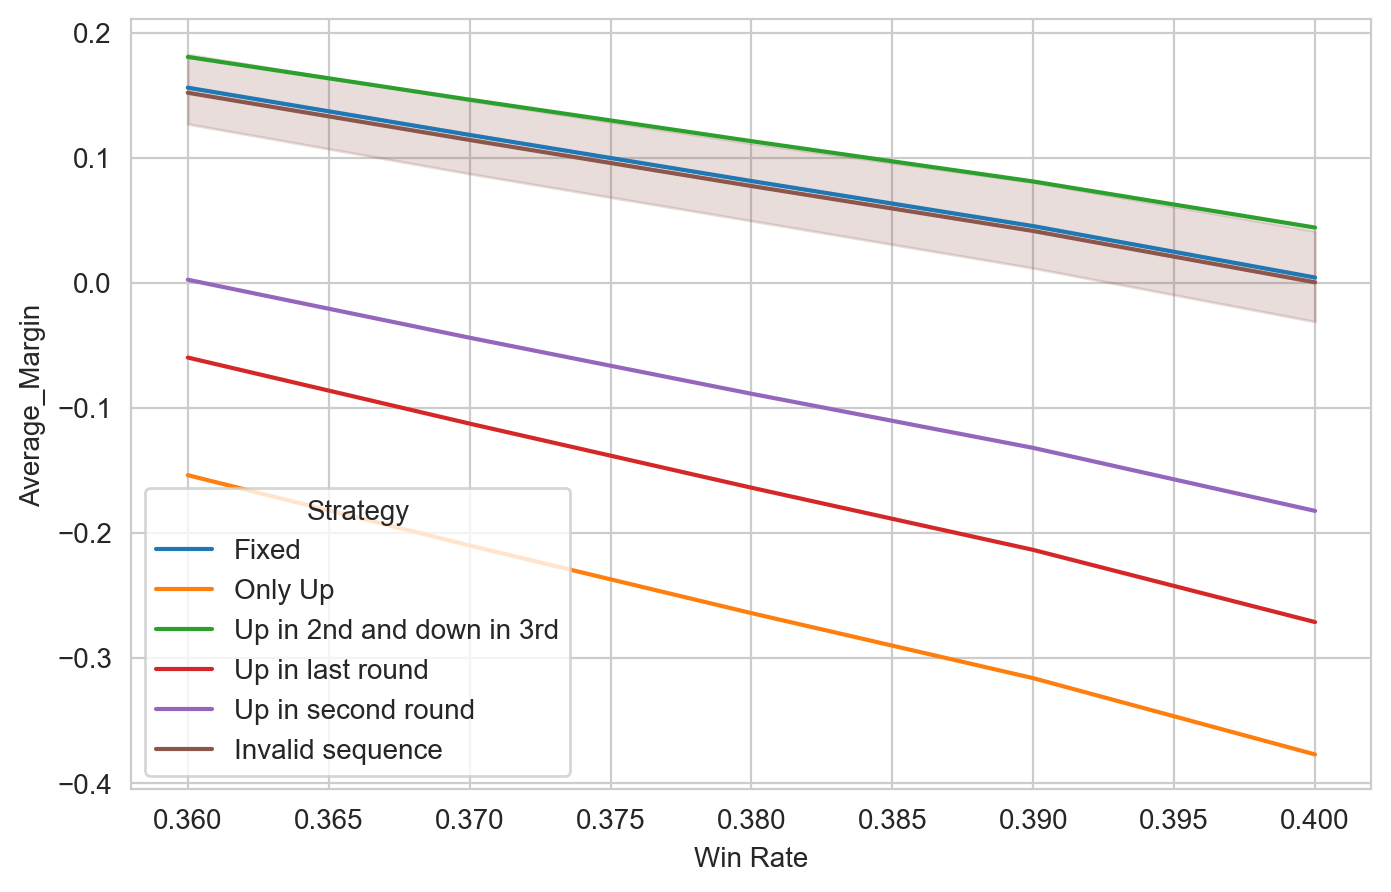

In [127]:
sns.set_style("whitegrid")
aggregated_results_3 = aggregated_results[aggregated_results['Initial Bet']==3]
sns.lineplot(data=aggregated_results, x="Win Rate", y="Average_Margin", hue="Strategy")

In [132]:
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant


data = aggregated_results.copy(deep=True)

data['Win Rate'] = data['Win Rate'].apply(lambda x: x * 100)  # Convert to percentage if needed

results = []

for strategy in data['Strategy'].unique():
    strategy_data = data[data['Strategy'] == strategy]
    X = add_constant(strategy_data['Win Rate'])  # Adds a constant term to the predictor
    y = strategy_data['Average_Margin']
    
    model = OLS(y, X).fit()
    slope = model.params['Win Rate']  # This is the decrease in margin for a 1% increase in win rate
    
    results.append({
        'Strategy': strategy,
        'Slope': slope  # Average decrease in margin for a 1% increase in win rate
    })

results_df = pd.DataFrame(results)
results_df


Strategy     Slope
0                      Fixed -0.037667
1                    Only Up -0.055286
2  Up in 2nd and down in 3rd -0.033842
3           Up in last round -0.052418
4         Up in second round -0.045796
5           Invalid sequence -0.037610

# Appendix/Notes

1. **Setup and Definitions**: The script starts by defining the probabilities of winning in each round, the multipliers for each win, the initial bet amounts, and the number of players per week.

2. **Calculate Round Details**: `calculate_round_details` function calculates the expected return and the number of winners for each round based on the bet amount and the round number.

3. **Generate Valid Combinations**: For the 'no skip' scenario, `generate_valid_combinations` generates all possible combinations of bets for the subsequent rounds, adhering to the rule of no skipping steps.

4. **Total Expected Details**: `total_expected_details` calculates the total expected return, total winners, and detailed winnings for each round for a given set of bets.

5. **Perform Simulation**: The `perform_simulation` function runs the simulation for both scenarios ('no skip' and 'fixed bet'). It calculates the expected GGR, total wagered amount, and winners in each round for each initial bet amount.

6. **Generate DataFrames and Display Results**: DataFrames for both scenarios are generated and printed, providing a detailed view of the outcomes for each scenario.

7. **Insights**: Finally, the script presents key insights derived from the simulations.

- 200 usrs
- average win on 3rd bet (±3 EUR)
bet 
- 10

In [ ]:
# total_players = 1200
# new_value = 0.37 * 0.37 * 0.37
# old_value = 0.36 * 0.36 * 0.36 

# new_value = total_players * new_value
# old_value = total_players * old_value


# percentage_difference = ((new_value - old_value) / old_value) * 100

# print(f"The percentage difference is {percentage_difference}%")

total_players = 1000
new_value = 0.37 * 0.37 * 0.37
old_value = 0.36 * 0.36 * 0.36 

new_value = total_players * new_value
old_value = total_players * old_value

# Calculate the absolute difference in the number of players
player_difference = new_value - old_value

print(f"The difference in players reaching the 3rd round is approximately {player_difference}")

In [5]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

In [55]:
# Given data and initial settings
given_combination = [3, 6, 6]
players_per_week = 1500
prob_win = 0.33  # Probability of winning each round

# Multipliers for each round
multiplier_1st_win = 1.5
multiplier_2nd_win = 2
multiplier_3rd_win = 10

# Initialize variables for calculations
total_wagered_per_round = [0, 0, 0]
players_remaining = players_per_week
total_expected_winnings = 0

# Round 1 Calculations
total_wagered_per_round[0] = given_combination[0] * players_remaining
players_remaining = int(players_per_week * prob_win)  # Players remaining after round 1
expected_winning_round1 = given_combination[0] * prob_win * multiplier_1st_win * players_per_week
total_expected_winnings += expected_winning_round1

# Round 2 Calculations
total_wagered_per_round[1] = given_combination[1] * players_remaining
players_remaining = int(players_remaining * prob_win)  # Players remaining after round 2
expected_winning_round2 = given_combination[1] * (prob_win ** 2) * multiplier_2nd_win * players_per_week
total_expected_winnings += expected_winning_round2

# Round 3 Calculations
total_wagered_per_round[2] = given_combination[2] * players_remaining
expected_winning_round3 = given_combination[2] * (prob_win ** 3) * multiplier_3rd_win * players_per_week
total_expected_winnings += expected_winning_round3

# Total Wagered and Expected GGR
total_wagered = sum(total_wagered_per_round)
expected_ggr = total_wagered - total_expected_winnings

# Results
result = {
    'Bet Sequence': '-'.join(map(str, given_combination)),
    'Total Wagered Round 1': total_wagered_per_round[0],
    'Total Wagered Round 2': total_wagered_per_round[1],
    'Total Wagered Round 3': total_wagered_per_round[2],
    'Total Wagered': total_wagered,
    'Total Expected Winnings': total_expected_winnings,
    'Expected GGR': expected_ggr,
    'Users with 1 Win': players_per_week * prob_win,
    'Users with 2 Wins': players_per_week * prob_win * prob_win,
    'Users with 3 Wins': players_per_week * prob_win * prob_win * prob_win
}

result


{'Bet Sequence': '3-6-6',
 'Total Wagered Round 1': 4500,
 'Total Wagered Round 2': 2970,
 'Total Wagered Round 3': 978,
 'Total Wagered': 8448,
 'Total Expected Winnings': 7422.030000000001,
 'Expected GGR': 1025.9699999999993,
 'Users with 1 Win': 495.0,
 'Users with 2 Wins': 163.35,
 'Users with 3 Wins': 53.9055}

In [61]:
# Given data and initial settings
given_combination = [3, 6, 6]

def calculate_scenario(given_combination):
    players_per_week = 1500
    prob_win = 0.33  # Probability of winning each round

    # Multipliers for each round
    multiplier_1st_win = 1.5
    multiplier_2nd_win = 2
    multiplier_3rd_win = 10

    # Initialize variables for calculations
    total_wagered_per_round = [0, 0, 0]
    players_remaining = players_per_week
    total_expected_winnings = 0

    # Round 1 Calculations
    total_wagered_per_round[0] = given_combination[0] * players_remaining
    players_remaining = int(players_per_week * prob_win)  # Players remaining after round 1
    expected_winning_round1 = given_combination[0] * prob_win * multiplier_1st_win * players_per_week
    total_expected_winnings += expected_winning_round1

    # Round 2 Calculations
    total_wagered_per_round[1] = given_combination[1] * players_remaining
    players_remaining = int(players_remaining * prob_win)  # Players remaining after round 2
    expected_winning_round2 = given_combination[1] * (prob_win ** 2) * multiplier_2nd_win * players_per_week
    total_expected_winnings += expected_winning_round2

    # Round 3 Calculations
    total_wagered_per_round[2] = given_combination[2] * players_remaining
    expected_winning_round3 = given_combination[2] * (prob_win ** 3) * multiplier_3rd_win * players_per_week
    total_expected_winnings += expected_winning_round3

    # Total Wagered and Expected GGR
    total_wagered = sum(total_wagered_per_round)
    expected_ggr = total_wagered - total_expected_winnings

    # Results
    result = {
        'Initial Bet' : given_combination[0],
        'Bet Sequence': '-'.join(map(str, given_combination)),
        'Total Wagered Round 1': total_wagered_per_round[0],
        'Total Wagered Round 2': total_wagered_per_round[1],
        'Total Wagered Round 3': total_wagered_per_round[2],
        'Total Wagered': total_wagered,
        'Total Expected Winnings': total_expected_winnings,
        'Expected GGR': expected_ggr,
        'Users with 1 Win': players_per_week * prob_win,
        'Users with 2 Wins': players_per_week * prob_win * prob_win,
        'Users with 3 Wins': players_per_week * prob_win * prob_win * prob_win
    }

    # result = pd.DataFrame(result, index=[0])
    
    return result

# given_combination = [3, 6, 6]
given_combination = [3, 6, 9]
outcome = calculate_scenario(given_combination)
outcome

{'Initial Bet': 3,
 'Bet Sequence': '3-6-9',
 'Total Wagered Round 1': 4500,
 'Total Wagered Round 2': 2970,
 'Total Wagered Round 3': 1467,
 'Total Wagered': 8937,
 'Total Expected Winnings': 9039.195000000002,
 'Expected GGR': -102.19500000000153,
 'Users with 1 Win': 495.0,
 'Users with 2 Wins': 163.35,
 'Users with 3 Wins': 53.9055}

## Simple sequence

In [6]:
# Given data and initial settings
given_combination = [3, 6, 9]
players_per_week = 1500
prob_win = 0.33  # Probability of winning each round

# Multipliers for each round
multiplier_1st_win = 1.5
multiplier_2nd_win = 2
multiplier_3rd_win = 10

# Initialize variables for calculations
total_wagered_per_round = [0, 0, 0]
players_remaining = players_per_week
total_expected_winnings = 0

# Round 1 Calculations
total_wagered_per_round[0] = given_combination[0] * players_remaining
players_remaining = int(players_per_week * prob_win)  # Players remaining after round 1
expected_winning_round1 = given_combination[0] * players_per_week * prob_win * multiplier_1st_win
total_expected_winnings += expected_winning_round1

# Round 2 Calculations
total_wagered_per_round[1] = given_combination[1] * players_remaining
players_remaining = int(players_remaining * prob_win)  # Players remaining after round 2
expected_winning_round2 = given_combination[1] * int(players_per_week * prob_win) * prob_win * multiplier_2nd_win
total_expected_winnings += expected_winning_round2

# Round 3 Calculations
total_wagered_per_round[2] = given_combination[2] * players_remaining
expected_winning_round3 = given_combination[2] * int(int(players_per_week * prob_win) * prob_win) * prob_win * multiplier_3rd_win
total_expected_winnings += expected_winning_round3

# Total Wagered and Expected GGR
total_wagered = sum(total_wagered_per_round)
expected_ggr = total_wagered - total_expected_winnings

# Results
result = {
    'Bet Sequence': '-'.join(map(str, given_combination)),
    'Total Wagered Round 1': total_wagered_per_round[0],
    'Total Wagered Round 2': total_wagered_per_round[1],
    'Total Wagered Round 3': total_wagered_per_round[2],
    'Total Wagered': total_wagered,
    'Total Expected Winnings': total_expected_winnings,
    'Expected GGR': expected_ggr,
    'Users with 1 Win': players_per_week * prob_win,
    'Users with 2 Wins': int(players_per_week * prob_win) * prob_win,
    'Users with 3 Wins': int(int(players_per_week * prob_win) * prob_win) * prob_win
}

result

{'Bet Sequence': '3-6-9',
 'Total Wagered Round 1': 4500,
 'Total Wagered Round 2': 2970,
 'Total Wagered Round 3': 1467,
 'Total Wagered': 8937,
 'Total Expected Winnings': 9028.8,
 'Expected GGR': -91.79999999999927,
 'Users with 1 Win': 495.0,
 'Users with 2 Wins': 163.35,
 'Users with 3 Wins': 53.79}

In [7]:
# Recalculating each step without using loops for more transparency

# Initial values
total_players = 1500
win_probability = 0.33

# Round 1 calculations
bet_round_1 = 3
multiplier_round_1 = 1.5
total_wagered_round_1 = total_players * bet_round_1
winners_round_1 = int(total_players * win_probability)
expected_winnings_round_1 = winners_round_1 * bet_round_1 * multiplier_round_1

# Round 2 calculations
bet_round_2 = 6
multiplier_round_2 = 2
total_wagered_round_2 = winners_round_1 * bet_round_2
winners_round_2 = int(winners_round_1 * win_probability)
expected_winnings_round_2 = winners_round_2 * bet_round_2 * multiplier_round_2

# Round 3 calculations
bet_round_3 = 9
multiplier_round_3 = 10
total_wagered_round_3 = winners_round_2 * bet_round_3
winners_round_3 = int(winners_round_2 * win_probability)
expected_winnings_round_3 = winners_round_3 * bet_round_3 * multiplier_round_3

# Total calculations
total_wagered_overall = total_wagered_round_1 + total_wagered_round_2 + total_wagered_round_3
total_expected_winnings_overall = expected_winnings_round_1 + expected_winnings_round_2 + expected_winnings_round_3
expected_ggr = total_wagered_overall - total_expected_winnings_overall

# Results
{
    "Total Wagered per Round": [total_wagered_round_1, total_wagered_round_2, total_wagered_round_3],
    "Number of Winners per Round": [winners_round_1, winners_round_2, winners_round_3],
    "Total Expected Winnings per Round": [expected_winnings_round_1, expected_winnings_round_2, expected_winnings_round_3],
    "Total Wagered Overall": total_wagered_overall,
    "Total Expected Winnings Overall": total_expected_winnings_overall,
    "Expected GGR": expected_ggr
}



{'Total Wagered per Round': [4500, 2970, 1467],
 'Number of Winners per Round': [495, 163, 53],
 'Total Expected Winnings per Round': [2227.5, 1956, 4770],
 'Total Wagered Overall': 8937,
 'Total Expected Winnings Overall': 8953.5,
 'Expected GGR': -16.5}

## All combinations

In [10]:
import pandas as pd

# Function to generate valid bet combinations for a given initial bet
def generate_combinations_for_bets(initial_bet):
    step_size = 3
    possible_bets = [3, 6, 9, 12, 15, 18, 21]
    valid_combinations = []
    for bet_2 in possible_bets:
        for bet_3 in possible_bets:
            if initial_bet <= bet_2 <= min(initial_bet + step_size, 21) and bet_2 <= bet_3 <= min(bet_2 + step_size, 21):
                valid_combinations.append((initial_bet, bet_2, bet_3))
    return valid_combinations

# Betting game simulation function
def betting_game_simulation(bet_sequence, total_players, win_probability, multipliers):
    total_wagered_per_round = []
    number_of_winners_per_round = []
    total_expected_winnings_per_round = []
    remaining_players = total_players

    for round_index, bet in enumerate(bet_sequence):
        total_wagered = remaining_players * bet
        total_wagered_per_round.append(total_wagered)

        winners = int(remaining_players * win_probability)
        number_of_winners_per_round.append(winners)

        expected_winnings = winners * bet * multipliers[round_index]
        total_expected_winnings_per_round.append(expected_winnings)

        remaining_players = winners

    total_wagered_overall = sum(total_wagered_per_round)
    total_expected_winnings_overall = sum(total_expected_winnings_per_round)
    expected_ggr = total_wagered_overall - total_expected_winnings_overall

    return {
        "Bet Sequence": bet_sequence,
        "Total Wagered per Round": total_wagered_per_round,
        "Number of Winners per Round": number_of_winners_per_round,
        "Total Expected Winnings per Round": total_expected_winnings_per_round,
        "Total Wagered Overall": total_wagered_overall,
        "Total Expected Winnings Overall": total_expected_winnings_overall,
        "Expected GGR": expected_ggr
    }

# Example inputs
total_players = 1200
win_probability = 0.37
multipliers = [1.5, 2, 10]

# Generate combinations and calculate outcomes for each initial bet
list_of_outcomes = []
for initial_bet in range(3, 22, 3):
    bet_combinations = generate_combinations_for_bets(initial_bet)
    for bet_sequence in bet_combinations:
        outcomes = betting_game_simulation(bet_sequence, total_players, win_probability, multipliers)
        outcomes['Initial Bet'] = initial_bet
        list_of_outcomes.append(outcomes)

# Creating DataFrame from the list of outcomes
all_outcomes_df = pd.DataFrame(list_of_outcomes)

# Extracting specific data for easier readability
all_outcomes_df['Total Wagered 1st Round'] = all_outcomes_df['Total Wagered per Round'].apply(lambda x: x[0])
all_outcomes_df['Total Wagered 2nd Round'] = all_outcomes_df['Total Wagered per Round'].apply(lambda x: x[1])
all_outcomes_df['Total Wagered 3rd Round'] = all_outcomes_df['Total Wagered per Round'].apply(lambda x: x[2])
all_outcomes_df['Total Expected Winnings 1st Round'] = all_outcomes_df['Total Expected Winnings per Round'].apply(lambda x: x[0])
all_outcomes_df['Total Expected Winnings 2nd Round'] = all_outcomes_df['Total Expected Winnings per Round'].apply(lambda x: x[1])
all_outcomes_df['Total Expected Winnings 3rd Round'] = all_outcomes_df['Total Expected Winnings per Round'].apply(lambda x: x[2])
all_outcomes_df['Total Expected Winnings Overall'] = all_outcomes_df['Total Expected Winnings Overall'].astype(int)
all_outcomes_df['Expected GGR'] = all_outcomes_df['Expected GGR'].astype(int)
all_outcomes_df['Total Winners 1st Round'] = all_outcomes_df['Number of Winners per Round'].apply(lambda x: x[0])
all_outcomes_df['Total Winners 2nd Round'] = all_outcomes_df['Number of Winners per Round'].apply(lambda x: x[1])
all_outcomes_df['Total Winners 3rd Round'] = all_outcomes_df['Number of Winners per Round'].apply(lambda x: x[2])

# Displaying the DataFrame
# Adding GGR per round and margin per row to the DataFrame

# Function to calculate GGR per round
def calculate_ggr_per_round(wagered_round, winnings_round):
    return wagered_round - winnings_round

# Calculating GGR per round and margin for each row
all_outcomes_df['GGR 1st Round'] = all_outcomes_df.apply(lambda row: calculate_ggr_per_round(row['Total Wagered 1st Round'], row['Total Expected Winnings 1st Round']), axis=1)
all_outcomes_df['GGR 2nd Round'] = all_outcomes_df.apply(lambda row: calculate_ggr_per_round(row['Total Wagered 2nd Round'], row['Total Expected Winnings 2nd Round']), axis=1)
all_outcomes_df['GGR 3rd Round'] = all_outcomes_df.apply(lambda row: calculate_ggr_per_round(row['Total Wagered 3rd Round'], row['Total Expected Winnings 3rd Round']), axis=1)

# Calculating margin (revenue/wager) for each row
all_outcomes_df['Margin'] = all_outcomes_df['Expected GGR'] / all_outcomes_df['Total Wagered Overall']

# Displaying the updated DataFrame
all_outcomes_df.head()  # Displaying the first few rows for brevity

order = [
    'Initial Bet',
    'Bet Sequence',
    'Total Wagered Overall',
    'Total Expected Winnings Overall',
    'Expected GGR',
    'Total Wagered 1st Round',
    'Total Wagered 2nd Round',
    'Total Wagered 3rd Round',
    'Total Expected Winnings 1st Round',
    'Total Expected Winnings 2nd Round',
    'Total Expected Winnings 3rd Round',
    'Total Winners 1st Round',
    'Total Winners 2nd Round',
    'Total Winners 3rd Round',
    'GGR 1st Round',
    'GGR 2nd Round',
    'GGR 3rd Round',
    'Margin',
    'Total Wagered per Round',
    'Number of Winners per Round',
    'Total Expected Winnings per Round',
 ]
all_outcomes_df = all_outcomes_df[order]
all_outcomes_df.head()


Bet Sequence Total Wagered per Round Number of Winners per Round  \
0    (3, 3, 3)       [3600, 1332, 492]              [444, 164, 60]   
1    (3, 3, 6)       [3600, 1332, 984]              [444, 164, 60]   
2    (3, 6, 6)       [3600, 2664, 984]              [444, 164, 60]   
3    (3, 6, 9)      [3600, 2664, 1476]              [444, 164, 60]   
4    (6, 6, 6)       [7200, 2664, 984]              [444, 164, 60]   

  Total Expected Winnings per Round  Total Wagered Overall  \
0               [1998.0, 984, 1800]                   5424   
1               [1998.0, 984, 3600]                   5916   
2              [1998.0, 1968, 3600]                   7248   
3              [1998.0, 1968, 5400]                   7740   
4              [3996.0, 1968, 3600]                  10848   

   Total Expected Winnings Overall  Expected GGR  Initial Bet  \
0                             4782           642            3   
1                             6582          -666            3   
2                             7566          -318            3   
3                             9366         -1626            3   
4                             9564          1284            6   

   Total Wagered 1st Round  Total Wagered 2nd Round  Total Wagered 3rd Round  \
0                     3600                     1332                      492   
1                     3600                     1332                      984   
2                     3600                     2664                      984   
3                     3600                     2664                     1476   
4                     7200                     2664                      984   

   Total Expected Winnings 1st Round  Total Expected Winnings 2nd Round  \
0                             1998.0                                984   
1                             1998.0                                984   
2                             1998.0                               1968   
3                             1998.0                               1968   
4                             3996.0                               1968   

   Total Expected Winnings 3rd Round  Total Winners 1st Round  \
0                               1800                      444   
1                               3600                      444   
2                               3600                      444   
3                               5400                      444   
4                               3600                      444   

   Total Winners 2nd Round  Total Winners 3rd Round  GGR 1st Round  \
0                      164                       60         1602.0   
1                      164                       60         1602.0   
2                      164                       60         1602.0   
3                      164                       60         1602.0   
4                      164                       60         3204.0   

   GGR 2nd Round  GGR 3rd Round    Margin  
0            348          -1308  0.118363  
1            348          -2616 -0.112576  
2            696          -2616 -0.043874  
3            696          -3924 -0.210078  
4            696          -2616  0.118363

Initial Bet Bet Sequence  Total Wagered Overall  \
0            3    (3, 3, 3)                   5424   
1            3    (3, 3, 6)                   5916   
2            3    (3, 6, 6)                   7248   
3            3    (3, 6, 9)                   7740   
4            6    (6, 6, 6)                  10848   

   Total Expected Winnings Overall  Expected GGR  Total Wagered 1st Round  \
0                             4782           642                     3600   
1                             6582          -666                     3600   
2                             7566          -318                     3600   
3                             9366         -1626                     3600   
4                             9564          1284                     7200   

   Total Wagered 2nd Round  Total Wagered 3rd Round  \
0                     1332                      492   
1                     1332                      984   
2                     2664                      984   
3                     2664                     1476   
4                     2664                      984   

   Total Expected Winnings 1st Round  Total Expected Winnings 2nd Round  \
0                             1998.0                                984   
1                             1998.0                                984   
2                             1998.0                               1968   
3                             1998.0                               1968   
4                             3996.0                               1968   

   Total Expected Winnings 3rd Round  Total Winners 1st Round  \
0                               1800                      444   
1                               3600                      444   
2                               3600                      444   
3                               5400                      444   
4                               3600                      444   

   Total Winners 2nd Round  Total Winners 3rd Round  GGR 1st Round  \
0                      164                       60         1602.0   
1                      164                       60         1602.0   
2                      164                       60         1602.0   
3                      164                       60         1602.0   
4                      164                       60         3204.0   

   GGR 2nd Round  GGR 3rd Round    Margin Total Wagered per Round  \
0            348          -1308  0.118363       [3600, 1332, 492]   
1            348          -2616 -0.112576       [3600, 1332, 984]   
2            696          -2616 -0.043874       [3600, 2664, 984]   
3            696          -3924 -0.210078      [3600, 2664, 1476]   
4            696          -2616  0.118363       [7200, 2664, 984]   

  Number of Winners per Round Total Expected Winnings per Round  
0              [444, 164, 60]               [1998.0, 984, 1800]  
1              [444, 164, 60]               [1998.0, 984, 3600]  
2              [444, 164, 60]              [1998.0, 1968, 3600]  
3              [444, 164, 60]              [1998.0, 1968, 5400]  
4              [444, 164, 60]              [3996.0, 1968, 3600]

In [ ]:
# Function to generate valid bet combinations for a given initial bet
def generate_combinations_for_bets(initial_bet):
    step_size = 3
    possible_bets = [3, 6, 9, 12, 15, 18, 21]
    valid_combinations = []
    for bet_2 in possible_bets:
        for bet_3 in possible_bets:
            valid_combinations.append((initial_bet, bet_2, bet_3))
    return valid_combinations

In [41]:
# Function to generate valid bet combinations for a given initial bet
def generate_combinations_for_bets(initial_bet):
    step_size = 3
    possible_bets = [3, 6, 9, 12, 15, 18, 21]
    valid_combinations = []
    for bet_2 in possible_bets:
        for bet_3 in possible_bets:
            if initial_bet <= bet_2 <= min(initial_bet + step_size, 21) and bet_2 <= bet_3 <= min(bet_2 + step_size, 21):
                valid_combinations.append((initial_bet, bet_2, bet_3))
    return valid_combinations


# def determine_strategy(bet_sequence):
#     initial_bet = bet_sequence[0]

#     if bet_sequence[0] == bet_sequence[1] == bet_sequence[2]:
#         return "Fixed"
#     elif bet_sequence[0] == bet_sequence[1] and bet_sequence[1] + initial_bet == bet_sequence[2]:
#         return "Same in 1st/2nd, Up in 3rd"
#     elif bet_sequence[0] + initial_bet == bet_sequence[1] and bet_sequence[1] == bet_sequence[2]:
#         return "Up in 2nd, Same in 3rd"
#     elif bet_sequence[0] + initial_bet == bet_sequence[1] and bet_sequence[1] + initial_bet == bet_sequence[2]:
#         return "Increasing"
#     else:
#         return "Invalid sequence"

def determine_strategy(bet_sequence):
    initial_bet = bet_sequence[0]

    if bet_sequence[0] == bet_sequence[1] == bet_sequence[2]:
        return "Fixed"
    elif bet_sequence[0] == bet_sequence[1] and bet_sequence[1] + initial_bet == bet_sequence[2]:
        return "Same in 1st/2nd, Up in 3rd"
    elif bet_sequence[0] + initial_bet == bet_sequence[1] and bet_sequence[1] == bet_sequence[2]:
        return "Up in 2nd, Same in 3rd"
    elif bet_sequence[0] + initial_bet == bet_sequence[1] and bet_sequence[1] + initial_bet == bet_sequence[2]:
        return "Increasing"
    elif bet_sequence[0] == bet_sequence[1] + initial_bet and bet_sequence[1] == bet_sequence[2] + initial_bet:
        return "Decreasing"
    else:
        return "Invalid sequence"

def generate_valid_bet_combinations():
    # Allowed bet initials
    allowed_bets = [3, 6, 9, 12, 18, 21]
    
    # Generate all possible sequences of 3 rounds
    all_combinations = [(x, y, z) for x in allowed_bets for y in allowed_bets for z in allowed_bets if y >= x and z >= y]
    
    # Filter combinations to ensure no round total exceeds 21
    # (This step might not be necessary based on the rules but here for completeness)
    valid_combinations = [combo for combo in all_combinations if sum(combo) <= 63]  # 63 is the max total for 3 rounds of 21
    
    return valid_combinations

# Betting game simulation function
def betting_game_simulation(bet_sequence, total_players, win_probability, multipliers):
    total_wagered_per_round = []
    number_of_winners_per_round = []
    total_expected_winnings_per_round = []
    remaining_players = total_players

    for round_index, bet in enumerate(bet_sequence):
        total_wagered = remaining_players * bet
        total_wagered_per_round.append(total_wagered)

        winners = int(remaining_players * win_probability)
        number_of_winners_per_round.append(winners)

        expected_winnings = winners * bet * multipliers[round_index]
        total_expected_winnings_per_round.append(expected_winnings)

        remaining_players = winners

    total_wagered_overall = sum(total_wagered_per_round)
    total_expected_winnings_overall = sum(total_expected_winnings_per_round)
    expected_ggr = total_wagered_overall - total_expected_winnings_overall

    return {
        "Bet Sequence": bet_sequence,
        "Total Wagered per Round": total_wagered_per_round,
        "Number of Winners per Round": number_of_winners_per_round,
        "Total Expected Winnings per Round": total_expected_winnings_per_round,
        "Total Wagered Overall": total_wagered_overall,
        "Total Expected Winnings Overall": total_expected_winnings_overall,
        "Expected GGR": expected_ggr,
        "Margin": expected_ggr / total_wagered_overall if total_wagered_overall else 0,
    }

# Inputs for the simulation
total_players = 1200
win_probability = 0.37
initial_multipliers = [1.5, 2]  # Fixed for the first two rounds
last_round_multipliers = [
    # 5, 6, 
    7, 
    8, 
    9, 
    10
    ] 

# Generate combinations and calculate outcomes for each initial bet and each multiplier for the last round
list_of_outcomes = []
for initial_bet in range(3, 22, 3):
    bet_combinations = generate_combinations_for_bets(initial_bet)
    for bet_sequence in bet_combinations:
        for last_multiplier in last_round_multipliers:
            multipliers = initial_multipliers + [last_multiplier]
            outcomes = betting_game_simulation(bet_sequence, total_players, win_probability, multipliers)
            outcomes['Initial Bet'] = initial_bet
            strategy = determine_strategy(bet_sequence)  # Determine strategy based on bet sequence
            outcomes['Strategy'] = strategy
            outcomes['Last Round Multiplier'] = last_multiplier
            outcomes['Game Mode'] = strategy  # Game Mode is now correctly assigned based on bet sequence pattern
            list_of_outcomes.append(outcomes)

# Creating DataFrame from the list of outcomes with the requested columns
all_outcomes_df = pd.DataFrame(list_of_outcomes)
# Add any additional processing to create or adjust columns as needed

# Display or save the DataFrame as needed
# Calculating additional columns for detailed analysis
all_outcomes_df['Total Wagered 1st Round'] = all_outcomes_df['Total Wagered per Round'].apply(lambda x: x[0])
all_outcomes_df['Total Wagered 2nd Round'] = all_outcomes_df['Total Wagered per Round'].apply(lambda x: x[1])
all_outcomes_df['Total Wagered 3rd Round'] = all_outcomes_df['Total Wagered per Round'].apply(lambda x: x[2])
all_outcomes_df['Total Expected Winnings 1st Round'] = all_outcomes_df['Total Expected Winnings per Round'].apply(lambda x: x[0])
all_outcomes_df['Total Expected Winnings 2nd Round'] = all_outcomes_df['Total Expected Winnings per Round'].apply(lambda x: x[1])
all_outcomes_df['Total Expected Winnings 3rd Round'] = all_outcomes_df['Total Expected Winnings per Round'].apply(lambda x: x[2])
all_outcomes_df['Total Winners 1st Round'] = all_outcomes_df['Number of Winners per Round'].apply(lambda x: x[0])
all_outcomes_df['Total Winners 2nd Round'] = all_outcomes_df['Number of Winners per Round'].apply(lambda x: x[1])
all_outcomes_df['Total Winners 3rd Round'] = all_outcomes_df['Number of Winners per Round'].apply(lambda x: x[2])

# Calculating GGR per round
all_outcomes_df['GGR 1st Round'] = all_outcomes_df.apply(lambda row: row['Total Wagered 1st Round'] - row['Total Expected Winnings 1st Round'], axis=1)
all_outcomes_df['GGR 2nd Round'] = all_outcomes_df.apply(lambda row: row['Total Wagered 2nd Round'] - row['Total Expected Winnings 2nd Round'], axis=1)
all_outcomes_df['GGR 3rd Round'] = all_outcomes_df.apply(lambda row: row['Total Wagered 3rd Round'] - row['Total Expected Winnings 3rd Round'], axis=1)

# columns_order = [
#     'Strategy', 
#     'Initial Bet', 
#     'Bet Sequence', 
#     'Expected GGR', 
#     'Margin', 
#     'Total Wagered Overall', 
#     'Total Expected Winnings Overall', 
#     'Total Wagered 1st Round', 
#     'Total Wagered 2nd Round', 
#     'Total Wagered 3rd Round', 
#     'Total Expected Winnings 1st Round', 
#     'Total Expected Winnings 2nd Round', 
#     'Total Expected Winnings 3rd Round', 
#     'Total Winners 1st Round', 
#     'Total Winners 2nd Round', 
#     'Total Winners 3rd Round', 
#     'GGR 1st Round', 
#     'GGR 2nd Round', 
#     'GGR 3rd Round', 
#     'Total Wagered per Round', 
#     'Number of Winners per Round', 
#     'Total Expected Winnings per Round'
# ]



# # Applying the column order to the DataFrame
# all_outcomes_df = all_outcomes_df[columns_order]
all_outcomes_df.head()

Bet Sequence Total Wagered per Round Number of Winners per Round  \
0    (3, 3, 3)       [3600, 1332, 492]              [444, 164, 60]   
1    (3, 3, 3)       [3600, 1332, 492]              [444, 164, 60]   
2    (3, 3, 3)       [3600, 1332, 492]              [444, 164, 60]   
3    (3, 3, 3)       [3600, 1332, 492]              [444, 164, 60]   
4    (3, 3, 6)       [3600, 1332, 984]              [444, 164, 60]   

  Total Expected Winnings per Round  Total Wagered Overall  \
0               [1998.0, 984, 1260]                   5424   
1               [1998.0, 984, 1440]                   5424   
2               [1998.0, 984, 1620]                   5424   
3               [1998.0, 984, 1800]                   5424   
4               [1998.0, 984, 2520]                   5916   

   Total Expected Winnings Overall  Expected GGR    Margin  Initial Bet  \
0                           4242.0        1182.0  0.217920            3   
1                           4422.0        1002.0  0.184735            3   
2                           4602.0         822.0  0.151549            3   
3                           4782.0         642.0  0.118363            3   
4                           5502.0         414.0  0.069980            3   

                     Strategy  Last Round Multiplier  \
0                       Fixed                      7   
1                       Fixed                      8   
2                       Fixed                      9   
3                       Fixed                     10   
4  Same in 1st/2nd, Up in 3rd                      7   

                    Game Mode  Total Wagered 1st Round  \
0                       Fixed                     3600   
1                       Fixed                     3600   
2                       Fixed                     3600   
3                       Fixed                     3600   
4  Same in 1st/2nd, Up in 3rd                     3600   

   Total Wagered 2nd Round  Total Wagered 3rd Round  \
0                     1332                      492   
1                     1332                      492   
2                     1332                      492   
3                     1332                      492   
4                     1332                      984   

   Total Expected Winnings 1st Round  Total Expected Winnings 2nd Round  \
0                             1998.0                                984   
1                             1998.0                                984   
2                             1998.0                                984   
3                             1998.0                                984   
4                             1998.0                                984   

   Total Expected Winnings 3rd Round  Total Winners 1st Round  \
0                               1260                      444   
1                               1440                      444   
2                               1620                      444   
3                               1800                      444   
4                               2520                      444   

   Total Winners 2nd Round  Total Winners 3rd Round  GGR 1st Round  \
0                      164                       60         1602.0   
1                      164                       60         1602.0   
2                      164                       60         1602.0   
3                      164                       60         1602.0   
4                      164                       60         1602.0   

   GGR 2nd Round  GGR 3rd Round  
0            348           -768  
1            348           -948  
2            348          -1128  
3            348          -1308  
4            348          -1536

In [42]:
# data
dt = all_outcomes_df.copy()

game_columns = [
    "Game Mode",
    "Initial Bet",
    "Bet Sequence",
    "Last Round Multiplier",
    "Expected GGR",
    "Margin",
    "Total Wagered Overall",
    "Total Expected Winnings Overall",
    "Total Wagered 1st Round",
    "Total Wagered 2nd Round",
    "Total Wagered 3rd Round",
    "Total Expected Winnings 1st Round",
    "Total Expected Winnings 2nd Round",
    "Total Expected Winnings 3rd Round",
    "Total Winners 1st Round",
    "Total Winners 2nd Round",
    "Total Winners 3rd Round",
    "GGR 1st Round",
    "GGR 2nd Round",
    "GGR 3rd Round",
    "Total Wagered per Round",
    "Number of Winners per Round",
    "Total Expected Winnings per Round"
]
dt = dt[game_columns]
dt = dt[dt['Game Mode'] != 'Invalid sequence']
# dt['Bet Sequence'] = dt['Bet Sequence'].astype(str)

url = 'https://docs.google.com/spreadsheets/d/18Kqn-KQdOYDJTg2wF31BbLXxrTQa5ThS1vHGFU3Ounk/edit#gid=588242904'
tab = '[x7/x8/9/x10]'

# 
sh = gc.open_by_url(url)
ws = sh.worksheet(tab)
ws.clear()

# laod data
dt = set_with_dataframe(ws, dt, col=1,row=1)

{'spreadsheetId': '18Kqn-KQdOYDJTg2wF31BbLXxrTQa5ThS1vHGFU3Ounk',
 'clearedRange': "'[x7/x8/9/x10]'!A1:Z2059"}

In [35]:
import math

def check_bet_sequence(bet_sequence, players_per_week, prob_win, prob_1st_win, prob_2nd_win, prob_3rd_win):
    players_remaining = players_per_week
    total_wagered_check = [0, 0, 0]  # For storing our calculated wagered amounts for each round

    # Iterate through each round in the bet sequence
    for round_num, bet in enumerate(bet_sequence):
        # Calculate the total wagered for this round
        total_wagered_check[round_num] = bet * players_remaining
        
        # Update the number of players remaining if not the last round
        if round_num < 2:
            players_remaining = math.floor(players_remaining * prob_win)

    # Calculating total wagered across all rounds
    total_wagered_all_rounds_check = sum(total_wagered_check)

    # Return the check results
    return {
        'Bet Sequence': '-'.join(map(str, bet_sequence)),
        'Check Total Wagered Round 1': total_wagered_check[0],
        'Check Total Wagered Round 2': total_wagered_check[1],
        'Check Total Wagered Round 3': total_wagered_check[2],
        'Check Total Wagered': total_wagered_all_rounds_check,
        'Remaining Players After Round 1': math.floor(players_per_week * prob_win),
        'Remaining Players After Round 2': math.floor(math.floor(players_per_week * prob_win) * prob_win)
    }

# Example usage of the function
bet_sequence = [21, 21, 21]  # Example bet sequence
players_per_week = 1500  # Total number of players
prob_win = 0.33  # Probability of winning each round
prob_1st_win = 0.33  # Probability of winning the first round (for expected return calculation)
prob_2nd_win = 0.095  # Probability of winning the second round (for expected return calculation)
prob_3rd_win = 0.045  # Probability of winning the third round (for expected return calculation)

# Running the check
check_results = check_bet_sequence(bet_sequence, players_per_week, prob_win, prob_1st_win, prob_2nd_win, prob_3rd_win)
print(check_results)


{'Bet Sequence': '21-21-21', 'Check Total Wagered Round 1': 31500, 'Check Total Wagered Round 2': 10395, 'Check Total Wagered Round 3': 3423, 'Check Total Wagered': 45318, 'Remaining Players After Round 1': 495, 'Remaining Players After Round 2': 163}


In [36]:
check_results

{'Bet Sequence': '21-21-21',
 'Check Total Wagered Round 1': 31500,
 'Check Total Wagered Round 2': 10395,
 'Check Total Wagered Round 3': 3423,
 'Check Total Wagered': 45318,
 'Remaining Players After Round 1': 495,
 'Remaining Players After Round 2': 163}

In [43]:
import pandas as pd
import math

# Function to calculate expected return for a given bet and round
def expected_return(bet, round_num, prob_1st_win, prob_2nd_win, prob_3rd_win, multiplier_1st_win, multiplier_2nd_win, multiplier_3rd_win):
    if round_num == 1:
        return bet * prob_1st_win * multiplier_1st_win
    elif round_num == 2:
        return bet * prob_2nd_win * multiplier_2nd_win
    elif round_num == 3:
        return bet * prob_3rd_win * multiplier_3rd_win
    else:
        return 0

# Function to generate valid bet combinations for a given initial bet
def generate_combinations_for_bets(initial_bet):
    step_size = 3
    possible_bets = [3, 6, 9, 12, 15, 18, 21]
    valid_combinations = []
    for bet_2 in possible_bets:
        for bet_3 in possible_bets:
            if initial_bet <= bet_2 <= min(initial_bet + step_size, 21) and bet_2 <= bet_3 <= min(bet_2 + step_size, 21):
                valid_combinations.append((initial_bet, bet_2, bet_3))
    return valid_combinations

# Function to calculate outcomes
def calculate_outcomes_corrected(combinations, players_per_week, prob_win, prob_1st_win, prob_2nd_win, prob_3rd_win, multiplier_1st_win, multiplier_2nd_win, multiplier_3rd_win):
    results = []
    unique_combinations = set(combinations)
    for combination in unique_combinations:
        players_remaining = players_per_week
        total_wagered_per_round = [0, 0, 0]
        for round_num, bet in enumerate(combination):
            total_wagered_per_round[round_num] = bet * players_remaining
            if round_num < 2:
                players_remaining = math.floor(players_remaining * prob_win)
        total_expected_winnings = sum(expected_return(bet, round_num + 1, prob_1st_win, prob_2nd_win, prob_3rd_win, multiplier_1st_win, multiplier_2nd_win, multiplier_3rd_win) * players_per_week * prob_win**round_num for round_num, bet in enumerate(combination))
        total_wagered = sum(total_wagered_per_round)
        expected_ggr = total_wagered - total_expected_winnings
        results.append({
            'Bet Sequence': '-'.join(map(str, combination)),
            'Total Wagered Round 1': total_wagered_per_round[0],
            'Total Wagered Round 2': total_wagered_per_round[1],
            'Total Wagered Round 3': total_wagered_per_round[2],
            'Total Wagered': total_wagered,
            'Total Expected Winnings': total_expected_winnings,
            'Expected GGR': expected_ggr
        })
    return pd.DataFrame(results)

# Define your variables
prob_1st_win = 0.33
prob_2nd_win = 0.095
prob_3rd_win = 0.045
multiplier_1st_win = 1.5
multiplier_2nd_win = 2
multiplier_3rd_win = 10
players_per_week = 1500
prob_win = 0.33  # Flat probability of winning each round

# Generate combinations and calculate outcomes for each initial bet
list_of_outcomes = []
for initial_bet in range(3, 22, 3):
    valid_combinations = generate_combinations_for_bets(initial_bet)
    df_outcomes = calculate_outcomes_corrected(valid_combinations, players_per_week, prob_win, prob_1st_win, prob_2nd_win, prob_3rd_win, multiplier_1st_win, multiplier_2nd_win, multiplier_3rd_win)
    df_outcomes['Initial Bet'] = initial_bet
    list_of_outcomes.append(df_outcomes)

# Concatenate all outcomes into a single DataFrame
all_outcomes_df = pd.concat(list_of_outcomes)
all_outcomes_df

Bet Sequence  Total Wagered Round 1  Total Wagered Round 2  \
0        3-3-6                   4500                   1485   
1        3-6-6                   4500                   2970   
2        3-3-3                   4500                   1485   
3        3-6-9                   4500                   2970   
0        6-6-6                   9000                   2970   
1       6-9-12                   9000                   4455   
2        6-9-9                   9000                   4455   
3        6-6-9                   9000                   2970   
0       9-9-12                  13500                   4455   
1      9-12-15                  13500                   5940   
2        9-9-9                  13500                   4455   
3      9-12-12                  13500                   5940   
0     12-15-18                  18000                   7425   
1     12-12-15                  18000                   5940   
2     12-15-15                  18000                   7425   
3     12-12-12                  18000                   5940   
0     15-18-18                  22500                   8910   
1     15-15-15                  22500                   7425   
2     15-18-21                  22500                   8910   
3     15-15-18                  22500                   7425   
0     18-21-21                  27000                  10395   
1     18-18-18                  27000                   8910   
2     18-18-21                  27000                   8910   
0     21-21-21                  31500                  10395   

   Total Wagered Round 3  Total Wagered  Total Expected Winnings  \
0                    978           6963                2950.6950   
1                    978           8448                3232.8450   
2                    489           6474                2730.1725   
3                   1467           8937                3453.3675   
0                    978          12948                5460.3450   
1                   1956          15411                6183.5400   
2                   1467          14922                5963.0175   
3                   1467          13437                5680.8675   
0                   1956          19911                8411.0400   
1                   2445          21885                8913.7125   
2                   1467          19422                8190.5175   
3                   1956          21396                8693.1900   
0                   2934          28359               11643.8850   
1                   2445          26385               11141.2125   
2                   2445          27870               11423.3625   
3                   1956          25896               10920.6900   
0                   2934          34344               14153.5350   
1                   2445          32370               13650.8625   
2                   3423          34833               14374.0575   
3                   2934          32859               13871.3850   
0                   3423          40818               16883.7075   
1                   2934          38844               16381.0350   
2                   3423          39333               16601.5575   
0                   3423          45318               19111.2075   

   Expected GGR  Initial Bet  
0     4012.3050            3  
1     5215.1550            3  
2     3743.8275            3  
3     5483.6325            3  
0     7487.6550            6  
1     9227.4600            6  
2     8958.9825            6  
3     7756.1325            6  
0    11499.9600            9  
1    12971.2875            9  
2    11231.4825            9  
3    12702.8100            9  
0    16715.1150           12  
1    15243.7875           12  
2    16446.6375           12  
3    14975.3100           12  
0    20190.4650           15  
1    18719.1375           15  
2    20458.9425           15  
3    18987.6150           15  
0    23934.2925           18  
1    22462.9650   

In [ ]:
# Function to generate valid bet combinations for a given initial bet
def generate_combinations_for_bets(initial_bet):
    step_size = 3
    possible_bets = [3, 6, 9, 12, 15, 18, 21]
    valid_combinations = []
    for bet_2 in possible_bets:
        for bet_3 in possible_bets:
            if initial_bet <= bet_2 <= min(initial_bet + step_size, 21) and bet_2 <= bet_3 <= min(bet_2 + step_size, 21):
                valid_combinations.append((initial_bet, bet_2, bet_3))
    return valid_combinations



def betting_game_simulation(bet_sequence, total_players, win_probability, multipliers):
    # Initialize variables
    total_wagered_per_round = []
    number_of_winners_per_round = []
    total_expected_winnings_per_round = []
    remaining_players = total_players

    # Calculate the total wagered, number of winners, and expected winnings for each round
    for round_index, bet in enumerate(bet_sequence):
        total_wagered = remaining_players * bet
        total_wagered_per_round.append(total_wagered)

        # Calculate the number of winners (rounded down)
        winners = int(remaining_players * win_probability)
        number_of_winners_per_round.append(winners)

        # Calculate expected winnings
        expected_winnings = winners * bet * multipliers[round_index]
        total_expected_winnings_per_round.append(expected_winnings)

        # Update the remaining players for the next round
        remaining_players = winners

    # Calculate total wagered and total expected winnings
    total_wagered_overall = sum(total_wagered_per_round)
    total_expected_winnings_overall = sum(total_expected_winnings_per_round)

    # Calculate Expected Gross Gaming Revenue (GGR)
    expected_ggr = total_wagered_overall - total_expected_winnings_overall

    return {
        "Bet Sequence": bet_sequence,
        "Total Wagered per Round": total_wagered_per_round,
        "Number of Winners per Round": number_of_winners_per_round,
        "Total Expected Winnings per Round": total_expected_winnings_per_round,
        "Total Wagered Overall": total_wagered_overall,
        "Total Expected Winnings Overall": total_expected_winnings_overall,
        "Expected GGR": expected_ggr
    }

# Example inputs

total_players = 1500
win_probability = 0.33
multipliers = [1.5, 2, 10]


# Calculate and display the outcomes
# Generate combinations and calculate outcomes for each initial bet
list_of_outcomes = []
for initial_bet in range(3, 22, 3):
    bet_sequence = generate_combinations_for_bets(initial_bet)
    for bet in bet_sequence:
        betting_game_outcomes = betting_game_simulation(bet, total_players, win_probability, multipliers)
        betting_game_outcomes['Initial Bet'] = initial_bet
        # betting_game_outcomes['bet_sequence'] = bet_sequence
        list_of_outcomes.append(betting_game_outcomes)
    # print(betting_game_outcomes)

# Concatenate all outcomes into a single DataFrame
# all_outcomes_df = pd.concat(list_of_outcomes)
# all_outcomes_df
all_outcomes_df = pd.DataFrame(list_of_outcomes)
all_outcomes_df['Total Wagered 1st Round'] = all_outcomes_df['Total Wagered per Round'].apply(lambda x: x[0])
all_outcomes_df['Total Wagered 2nd Round'] = all_outcomes_df['Total Wagered per Round'].apply(lambda x: x[1])
all_outcomes_df['Total Wagered 3rd Round'] = all_outcomes_df['Total Wagered per Round'].apply(lambda x: x[2])
all_outcomes_df['Total Expected Winnings 1st Round'] = all_outcomes_df['Total Expected Winnings per Round'].apply(lambda x: x[0])
all_outcomes_df['Total Expected Winnings 2nd Round'] = all_outcomes_df['Total Expected Winnings per Round'].apply(lambda x: x[1])
all_outcomes_df['Total Expected Winnings 3rd Round'] = all_outcomes_df['Total Expected Winnings per Round'].apply(lambda x: x[2])
all_outcomes_df['Total Expected Winnings Overall'] = all_outcomes_df['Total Expected Winnings Overall'].astype(int)
all_outcomes_df['Expected GGR'] = all_outcomes_df['Expected GGR'].astype(int)
all_outcomes_df['Total Winners 1st Round'] = all_outcomes_df['Number of Winners per Round'].apply(lambda x: x[0])
all_outcomes_df['Total Winners 2nd Round'] = all_outcomes_df['Number of Winners per Round'].apply(lambda x: x[1])
all_outcomes_df['Total Winners 3rd Round'] = all_outcomes_df['Number of Winners per Round'].apply(lambda x: x[2])
all_outcomes_df



In [ ]:
def export_to_gstab(
    data,
    tab,
    url,
    clear=True,
):
    sh = gc.open_by_url(url)
    ws = sh.worksheet(tab)
    if clear:
        ws.clear()
    dt = set_with_dataframe(ws, data,)
    return dt


# Calculate the lower and upper bounds for each bin
inital_bet_bins = [3,6,9,12,15,18,21]
bin_bounds = [bet * 0.8 for bet in inital_bet_bins] + [bet * 1.2 for bet in inital_bet_bins[-1:]]

# Assign the bin number based on the bet amount
# data['bet_bins'] = pd.cut(data['Bet amount'], bins=bin_bounds, labels=inital_bet_bins, right=False)
data['bet_bins'] = data['Bet amount'].round(0).astype(int)
data['bet_bins'] = np.where(data['bet_bins'] == 0, 1, data['bet_bins'])
bet_order = 1
dt = data[data['bet_order']==bet_order].groupby('bet_bins').agg({
    'User_id':'nunique',
    'Round_id':'nunique',
    'Bet amount':'mean',
    'Reward':'mean',
}).rename(columns={
    'User_id':'total_users',
    'Round_id':'total_rounds',
    'Bet amount':'average_bet_amount',
    'Reward':'average_reward',
})
dt['average_reward_per_bet'] = dt['average_reward']/dt['average_bet_amount']
dt['bet_order'] = bet_order
dt['bettting_probabilities'] = dt['total_users']/dt['total_users'].sum()
url = "https://docs.google.com/spreadsheets/d/1pWiTe1kqtzGfNiIC03e8l25TZqzZBBpso1yG3e9kl_M"

export_to_gstab(data, "[data]", url, clear=True)
# export_to_gstab(consecutive_wins_per_user, "[consecutive-wins]", url, clear=True)

user_daily_stats_df['date'] = pd.to_datetime(user_daily_stats_df['date'])
user_daily_stats_df['date_week'] = user_daily_stats_df['date'].dt.to_period('W')
export_to_gstab(user_daily_stats_df, "[users]", url, clear=True)
export_to_gstab(dt.reset_index(), "[stats]", url, clear=True)


export_to_gstab(
    df_outcomes_with_user_wins_and_winnings, 
    "scenarios",
    url, 
    clear=True
    )